In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg

In [84]:
img = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/semantic_map/ISIC_0000374_semantic.png')

In [85]:
import queue

def bfs(image, mask, i, j, current_color, component_index):
    q = queue.Queue()
    q.put((i, j))
    while not q.empty():
        i, j = q.get()
        if i < 0 or j < 0:
            continue
        if i >= image.shape[0] or j >= image.shape[1]:
            continue
        if mask[i][j] == 0 and image[i][j] == current_color:
            mask[i][j] = component_index
            q.put((i - 1, j - 1))
            q.put((i - 1, j))
            q.put((i - 1, j + 1))

            q.put((i, j - 1))
            q.put((i, j))
            q.put((i, j + 1))

            q.put((i + 1, j - 1))
            q.put((i + 1, j))
            q.put((i + 1, j + 1))

def group_by_classes(image):
    component_color = 1
    mask = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if mask[i][j] == 0:
                color = image[i][j]
                bfs(image, mask, i, j, color, component_color)
                component_color += 1
    return image, mask


def union_areas_to_rect(image):
    img, msk = group_by_classes(image)

    group_classes = np.unique(msk)

    class_index = []
    for cls in group_classes:
        i_idx, j_idx = np.where(msk == cls)
        min_i_idx = i_idx.min()
        max_i_idx = i_idx.max()

        min_j_idx = j_idx.min()
        max_j_idx = j_idx.max()
        color = img[i_idx[0]][j_idx[0]]
        class_index.append((cls, color, (min_i_idx, min_j_idx), (max_i_idx, max_j_idx)))

    for i in range(len(class_index)):
        for j in range(i + 1, len(class_index)):
            a_i_1, a_j_1 = class_index[i][2]
            a_i_2, a_j_2 = class_index[i][3]

            b_i_1, b_j_1 = class_index[j][2]
            b_i_2, b_j_2 = class_index[j][3]

            if a_i_1 < b_i_2 and a_i_2 > b_i_1 and a_j_1 < b_j_2 and a_j_2 > b_j_1:
                sq_a = (a_i_1 - a_i_2) ** 2 + (a_j_1 - a_j_2) ** 2
                sq_b = (b_i_1 - b_i_2) ** 2 + (b_j_1 - b_j_2) ** 2
                # case when rect_a in rect_b covered by square comparison
                if sq_a < sq_b:
                        tmp = class_index[i]
                        class_index[i] = class_index[j]
                        class_index[j] = tmp

    rectangle_image = np.zeros(msk.shape)
    for (cls, color, (min_i, min_j), (max_i, max_j)) in class_index:
        rectangle_image[min_i: max_i, min_j:max_j] = color
    return rectangle_image

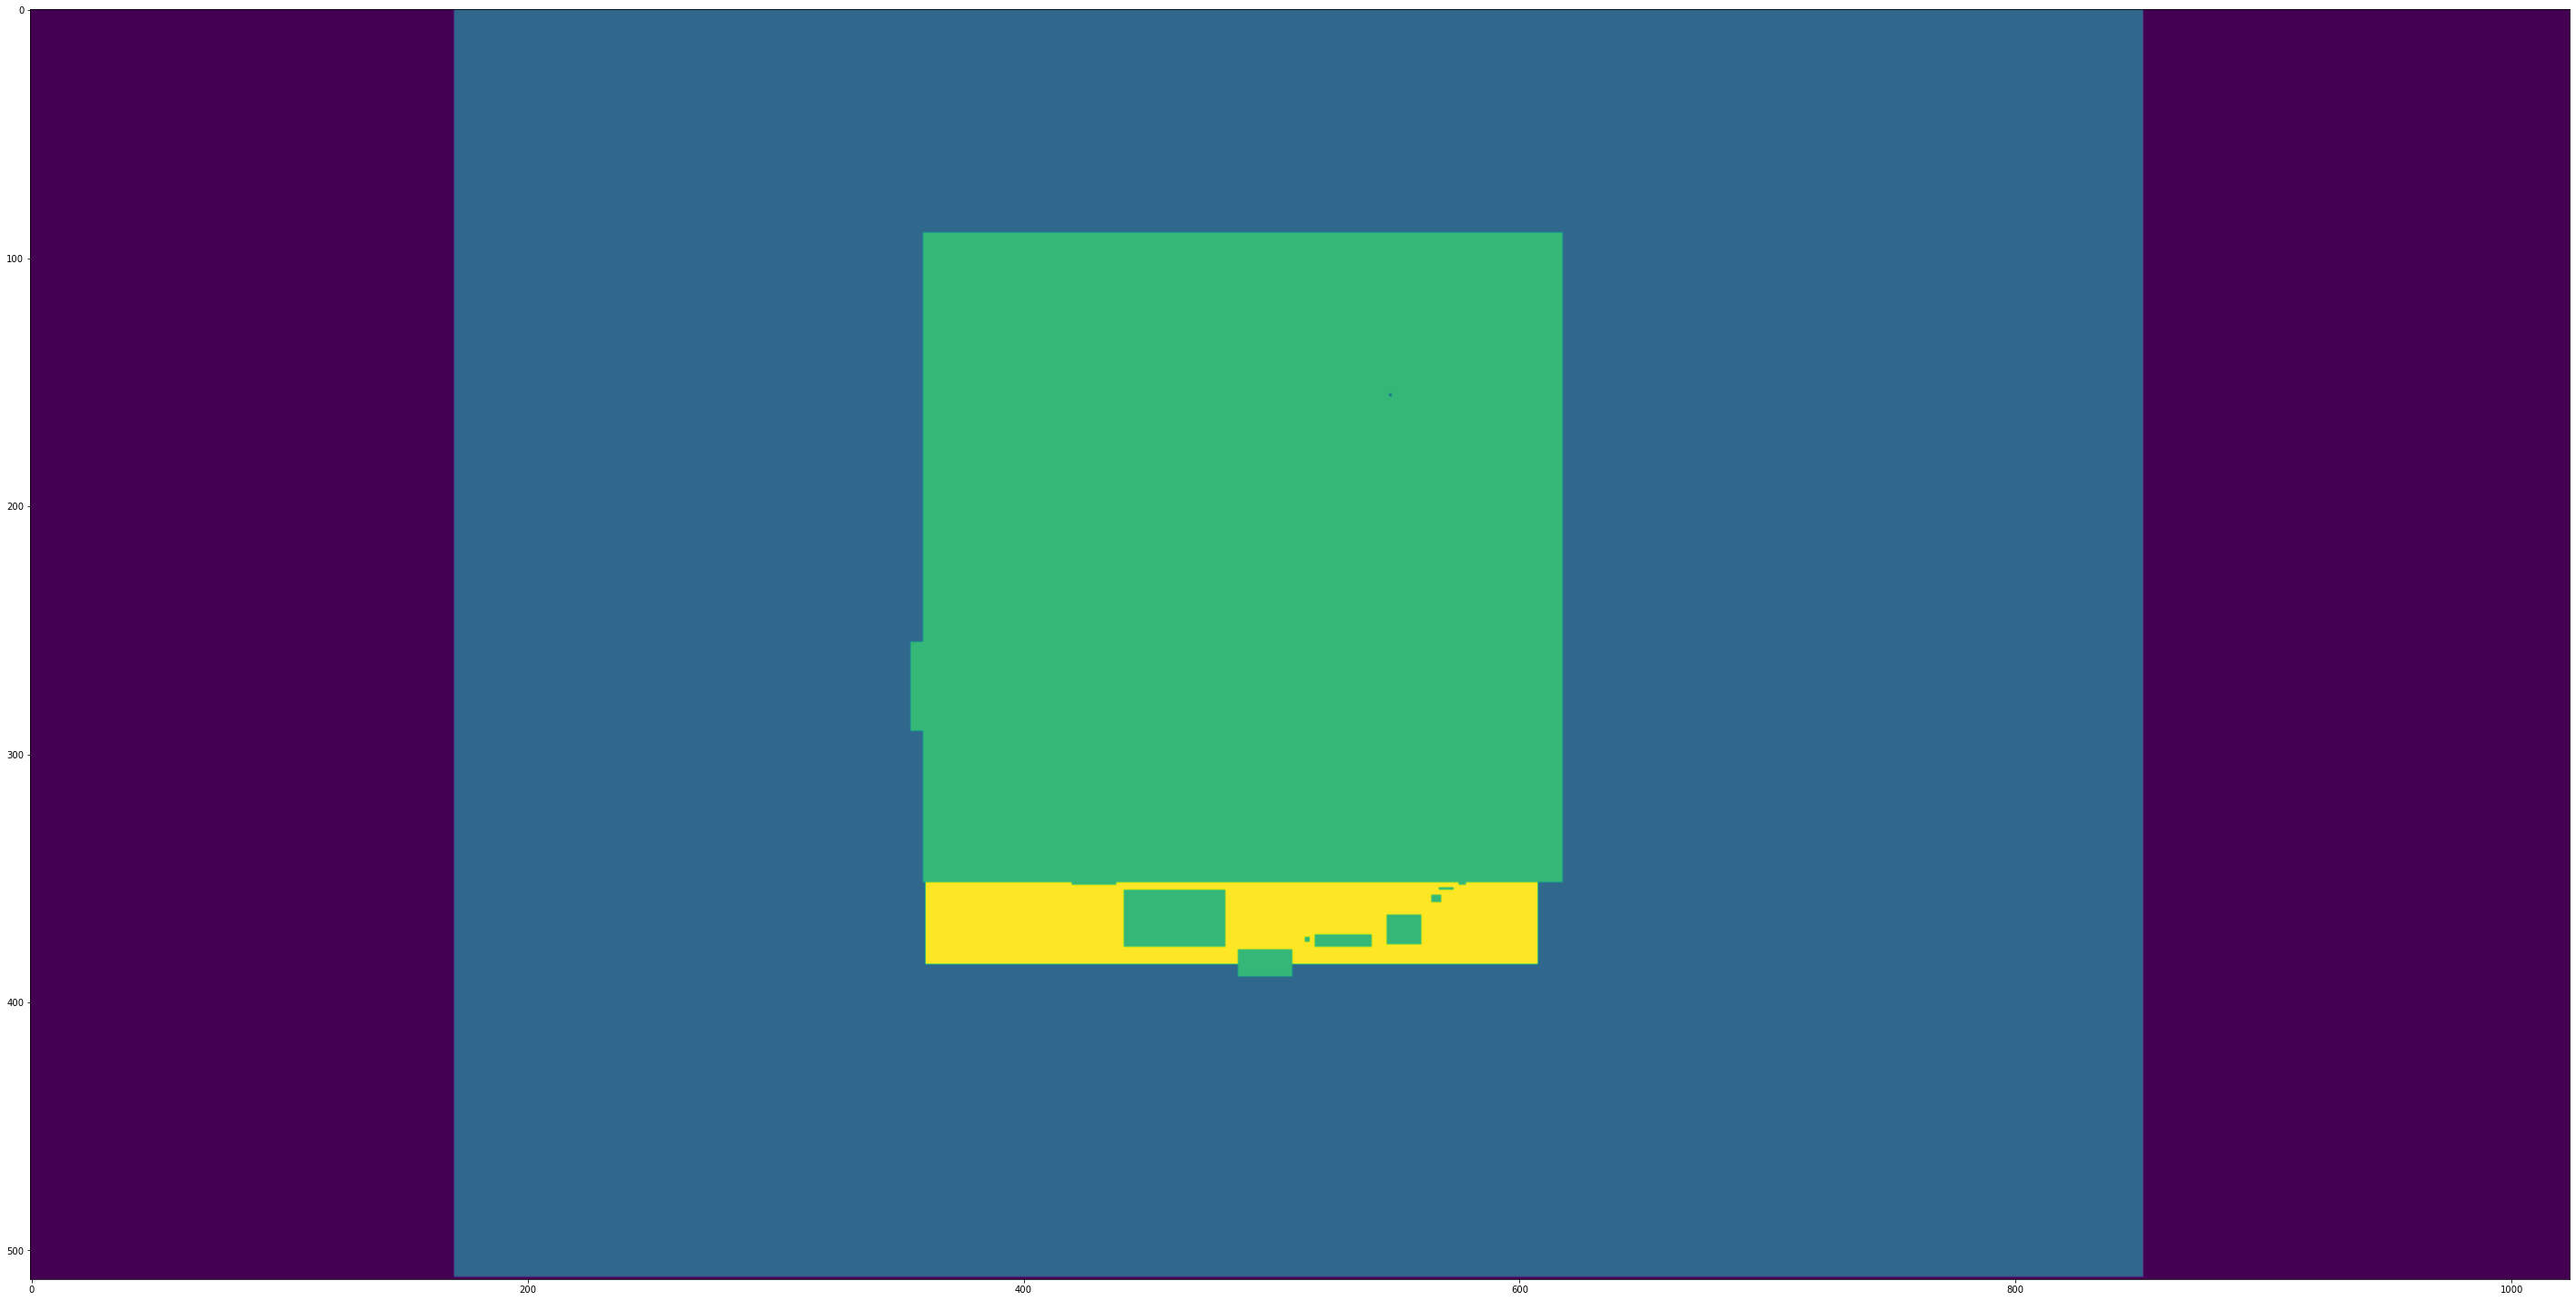

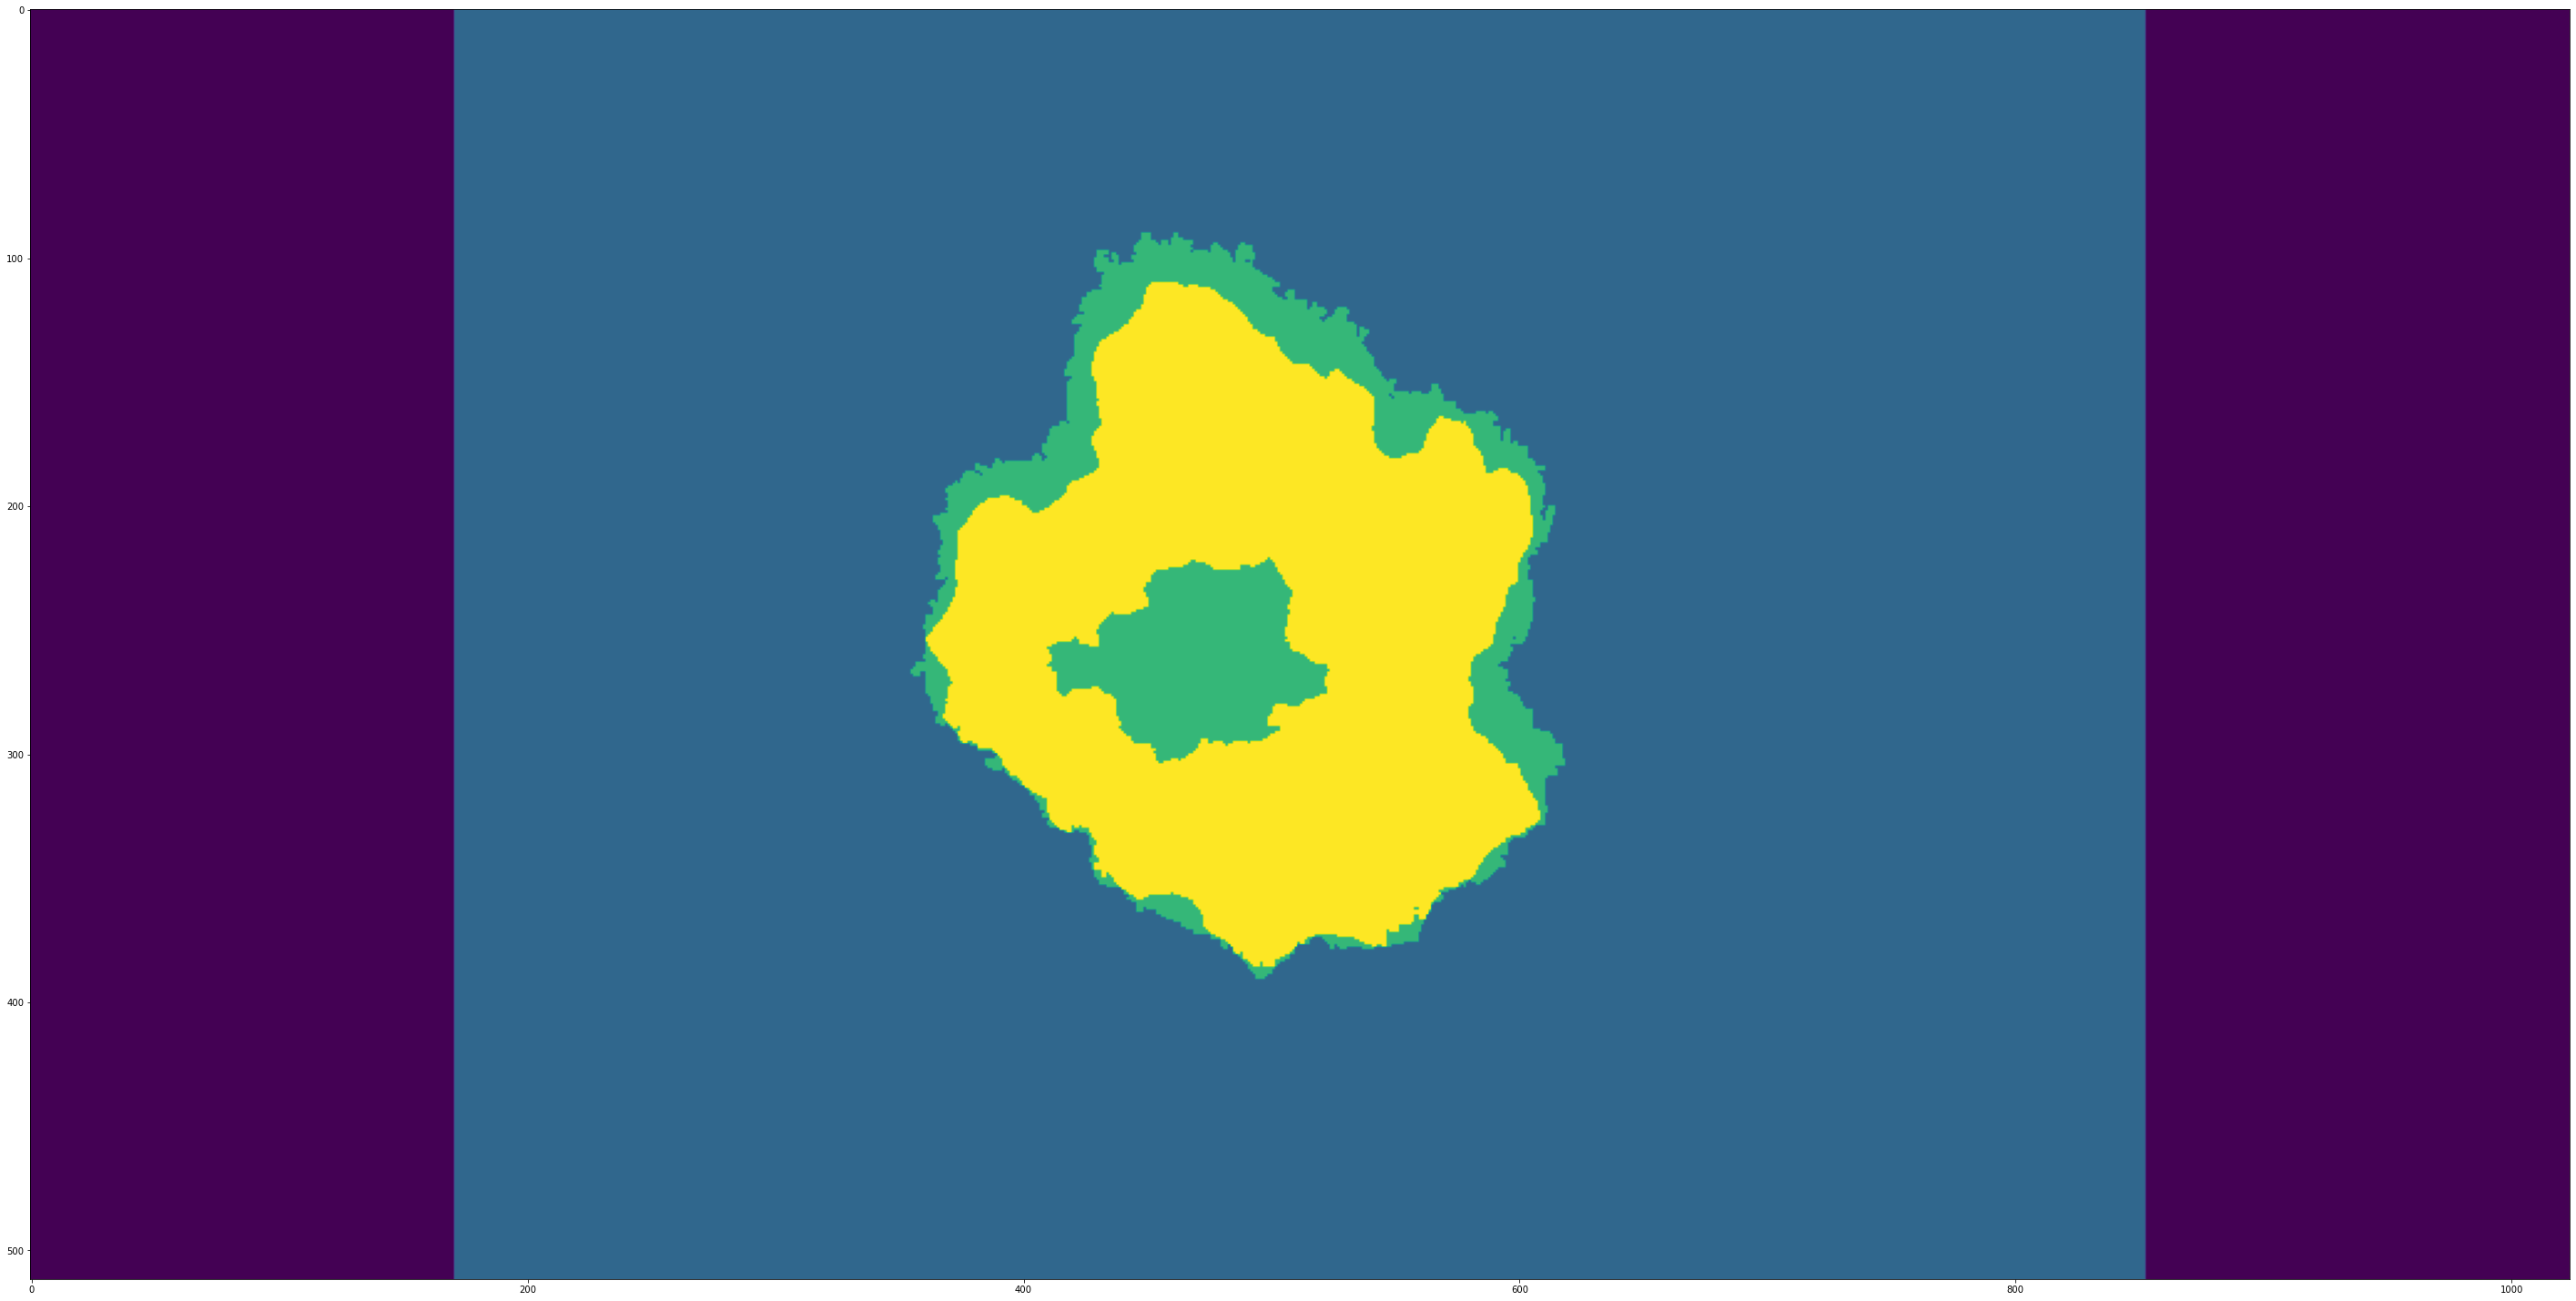

In [86]:
rectangle_image = union_areas_to_rect(img)

plt.figure(figsize = (50,50))
plt.imshow(rectangle_image)

plt.figure(figsize = (50,50))
plt.imshow(img)

In [87]:
img1 = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/boxes_semantic_map/ISIC_0000374_semantic.png')
plt.figure(figsize = (50,50))
plt.imshow(img1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nduginets/PycharmProjects/master-diploma/300img/boxes_semantic_map/ISIC_0000374_semantic.png'

In [88]:
import queue


def bfs(image, mask, i, j, current_color, component_index):
    q = queue.Queue()
    q.put((i, j))
    while not q.empty():
        i, j = q.get()
        if i < 0 or j < 0:
            continue
        if i >= image.shape[0] or j >= image.shape[1]:
            continue
        if mask[i][j] == 0 and image[i][j] == current_color:
            mask[i][j] = component_index
            q.put((i - 1, j - 1))
            q.put((i - 1, j))
            q.put((i - 1, j + 1))

            q.put((i, j - 1))
            q.put((i, j))
            q.put((i, j + 1))

            q.put((i + 1, j - 1))
            q.put((i + 1, j))
            q.put((i + 1, j + 1))


def group_by_classes(image):
    component_color = 1
    mask = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if mask[i][j] == 0:
                color = image[i][j]
                bfs(image, mask, i, j, color, component_color)
                component_color += 1
    return image, mask


def union_areas_to_rect(image):
    img, msk = group_by_classes(image)

    group_classes = np.unique(msk)

    class_index = []
    for cls in group_classes:
        i_idx, j_idx = np.where(msk == cls)
        min_i_idx = i_idx.min()
        max_i_idx = i_idx.max()

        min_j_idx = j_idx.min()
        max_j_idx = j_idx.max()
        color = img[i_idx[0]][j_idx[0]]
        class_index.append((cls, color, (min_i_idx, min_j_idx), (max_i_idx, max_j_idx)))

    for i in range(len(class_index)):
        for j in range(i + 1, len(class_index)):
            a_i_1, a_j_1 = class_index[i][2]
            a_i_2, a_j_2 = class_index[i][3]

            b_i_1, b_j_1 = class_index[j][2]
            b_i_2, b_j_2 = class_index[j][3]

            if a_i_1 < b_i_2 and a_i_2 > b_i_1 and a_j_1 < b_j_2 and a_j_2 > b_j_1:
                sq_a = (a_i_1 - a_i_2) ** 2 + (a_j_1 - a_j_2) ** 2
                sq_b = (b_i_1 - b_i_2) ** 2 + (b_j_1 - b_j_2) ** 2
                # case when rect_a in rect_b covered by square comparison
                if sq_a < sq_b:
                    tmp = class_index[i]
                    class_index[i] = class_index[j]
                    class_index[j] = tmp

    rectangle_image = np.zeros(msk.shape)
    for (cls, color, (min_i, min_j), (max_i, max_j)) in class_index:
        rectangle_image[min_i: max_i, min_j:max_j] = color
    return rectangle_image


array([0.01525902, 0.01527428, 0.01528954, 0.0153048 , 0.01532006,
       0.01533532, 0.01535058, 0.01536584, 0.01538109, 0.01539635,
       0.01541161, 0.01542687, 0.01544213, 0.01545739, 0.01547265,
       0.01548791, 0.01550317, 0.01551843, 0.01553368, 0.01554894,
       0.0155642 , 0.01557946, 0.01559472, 0.01560998, 0.01562524,
       0.0156405 , 0.01565576, 0.01567101, 0.01568628, 0.01570153,
       0.01571679, 0.01573205, 0.01574731, 0.01576257, 0.01577783,
       0.01579309, 0.01580835, 0.01582361, 0.01583887, 0.01585412,
       0.01586938, 0.01588464, 0.0158999 , 0.01591516, 0.01593042,
       0.01594568, 0.01596094, 0.0159762 , 0.01599145, 0.01600671,
       0.01602197, 0.01603723, 0.01605249, 0.01606775, 0.01608301,
       0.01609827, 0.01611353, 0.01612879, 0.01614404, 0.0161593 ,
       0.01617456, 0.01618982, 0.01620508, 0.01622034, 0.0162356 ,
       0.01625086, 0.01626612, 0.01628138, 0.01629664, 0.0163119 ,
       0.01632715, 0.01634241, 0.01635767, 0.01637293, 0.01638

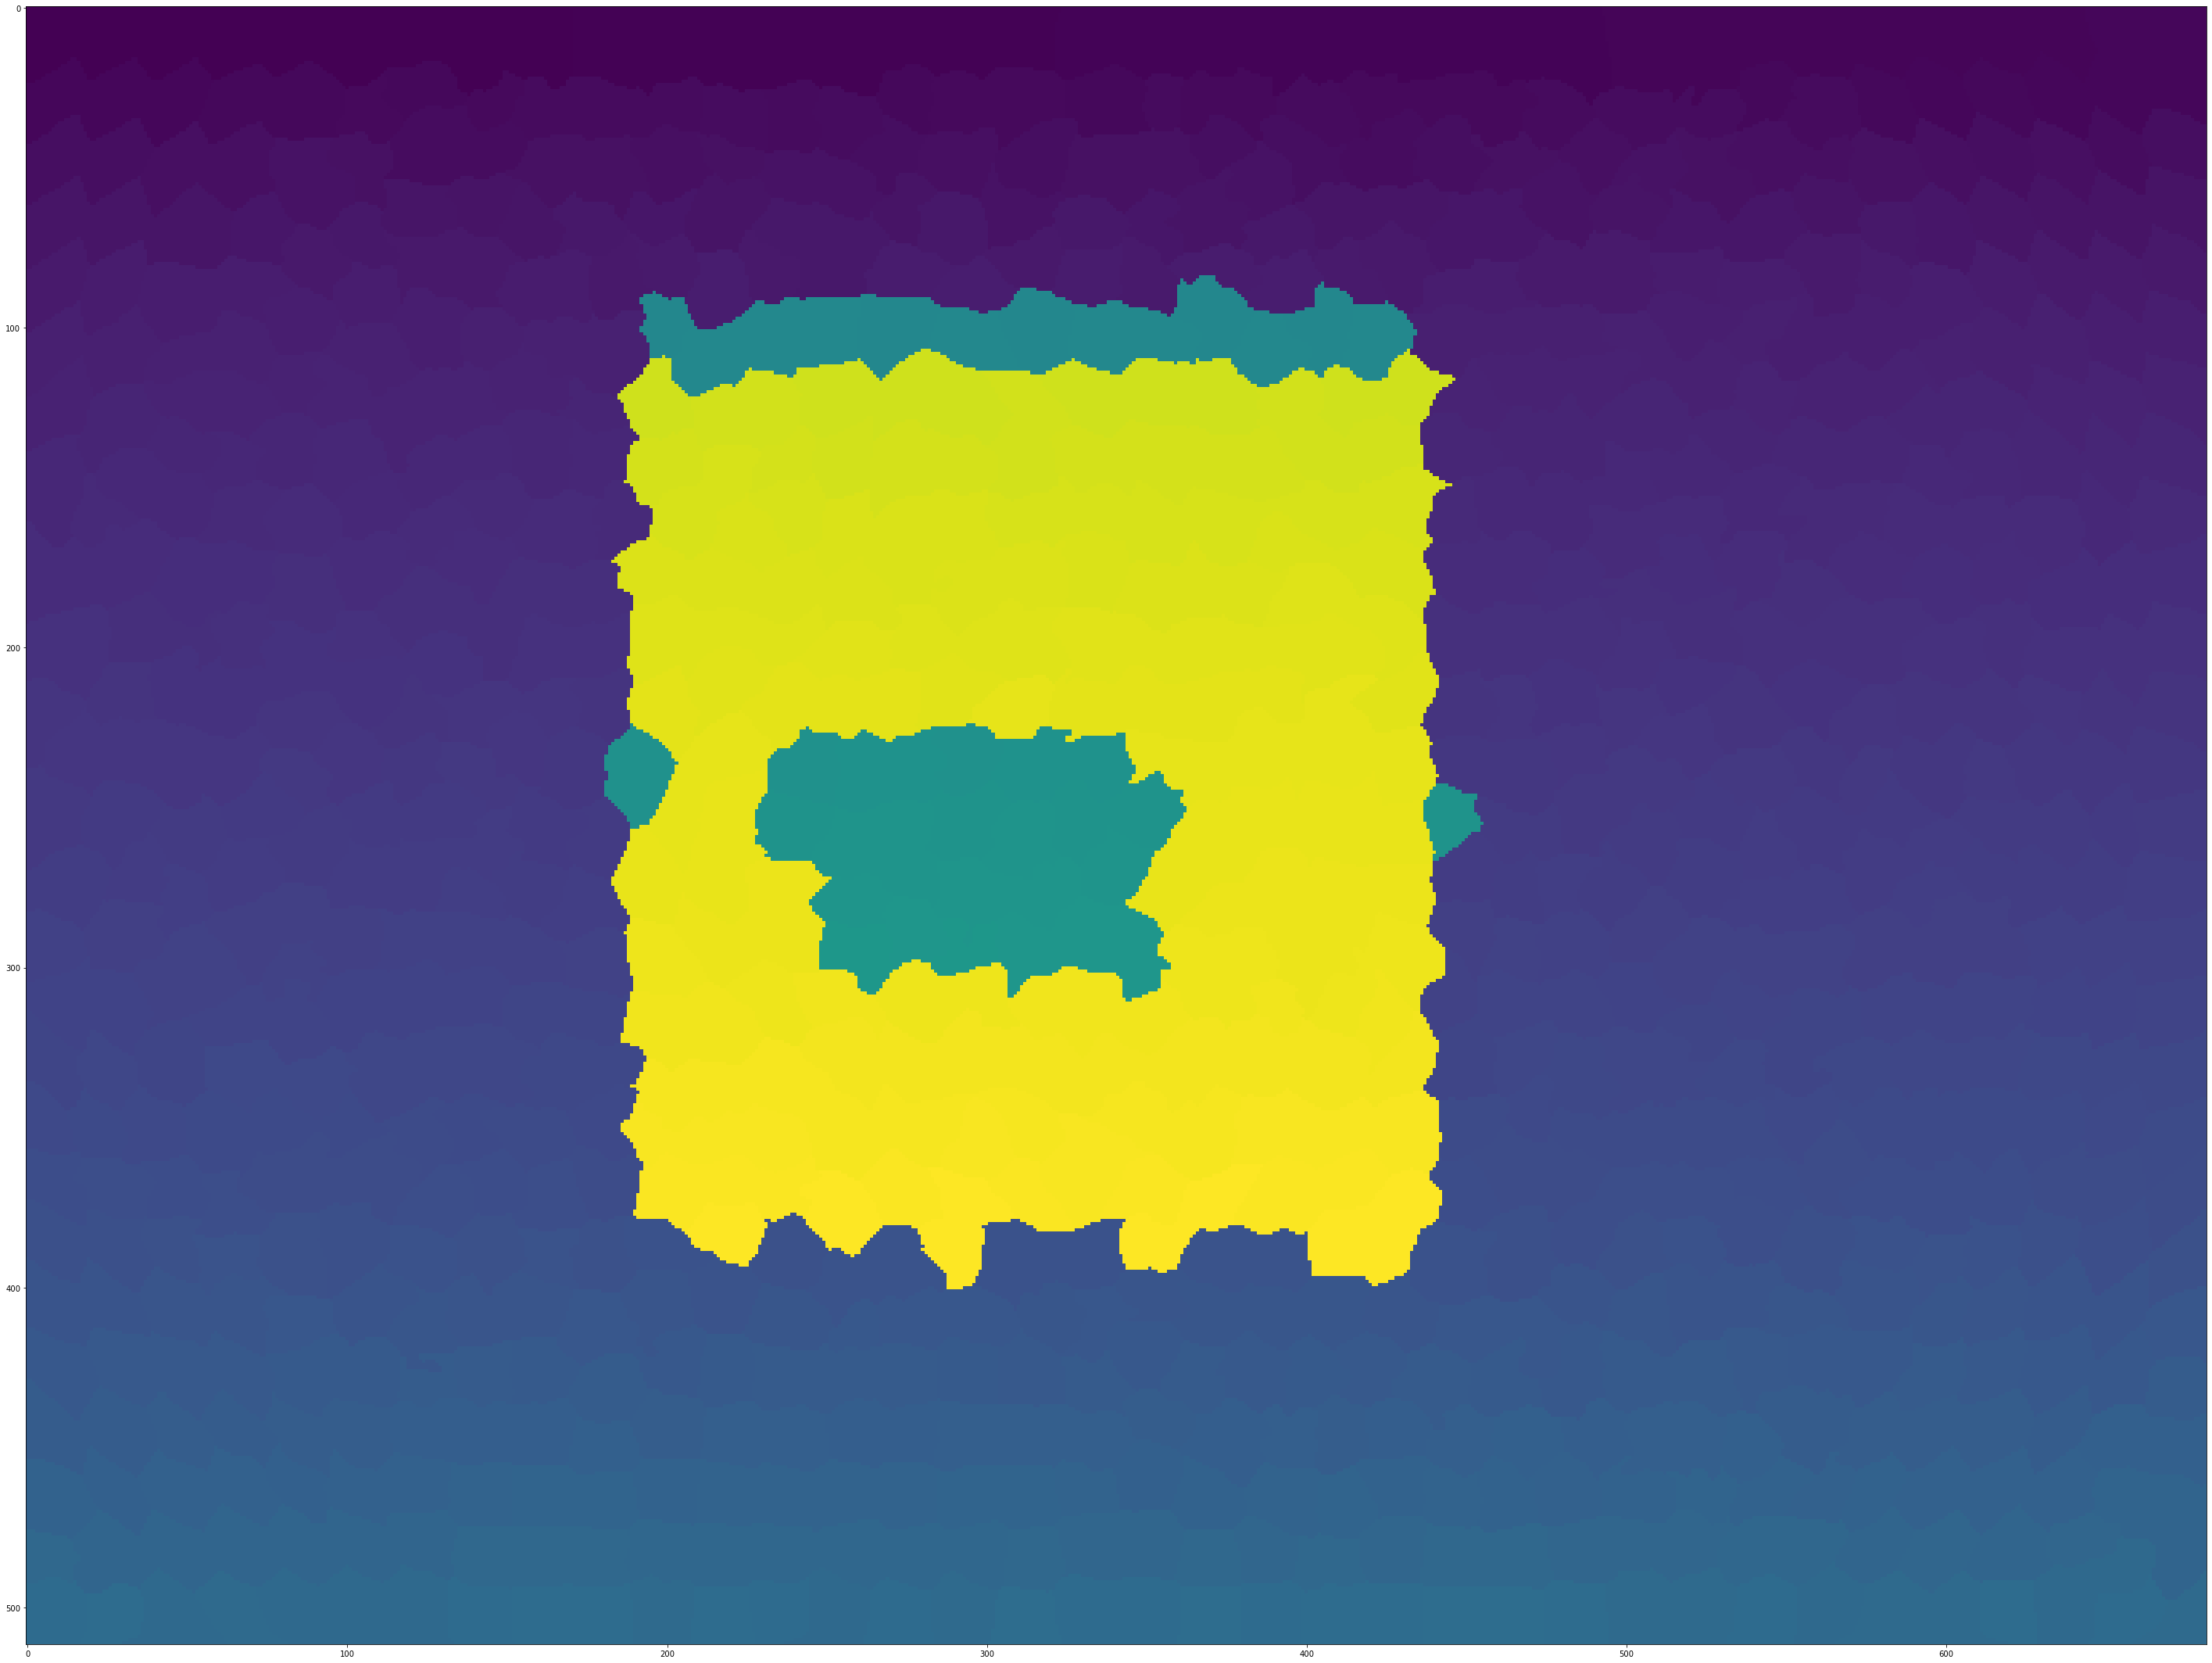

In [105]:

img = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/instance_map_no_border/ISIC_0000374_instance.png')
plt.figure(figsize = (50,50))
plt.imshow(img)
np.unique(img)

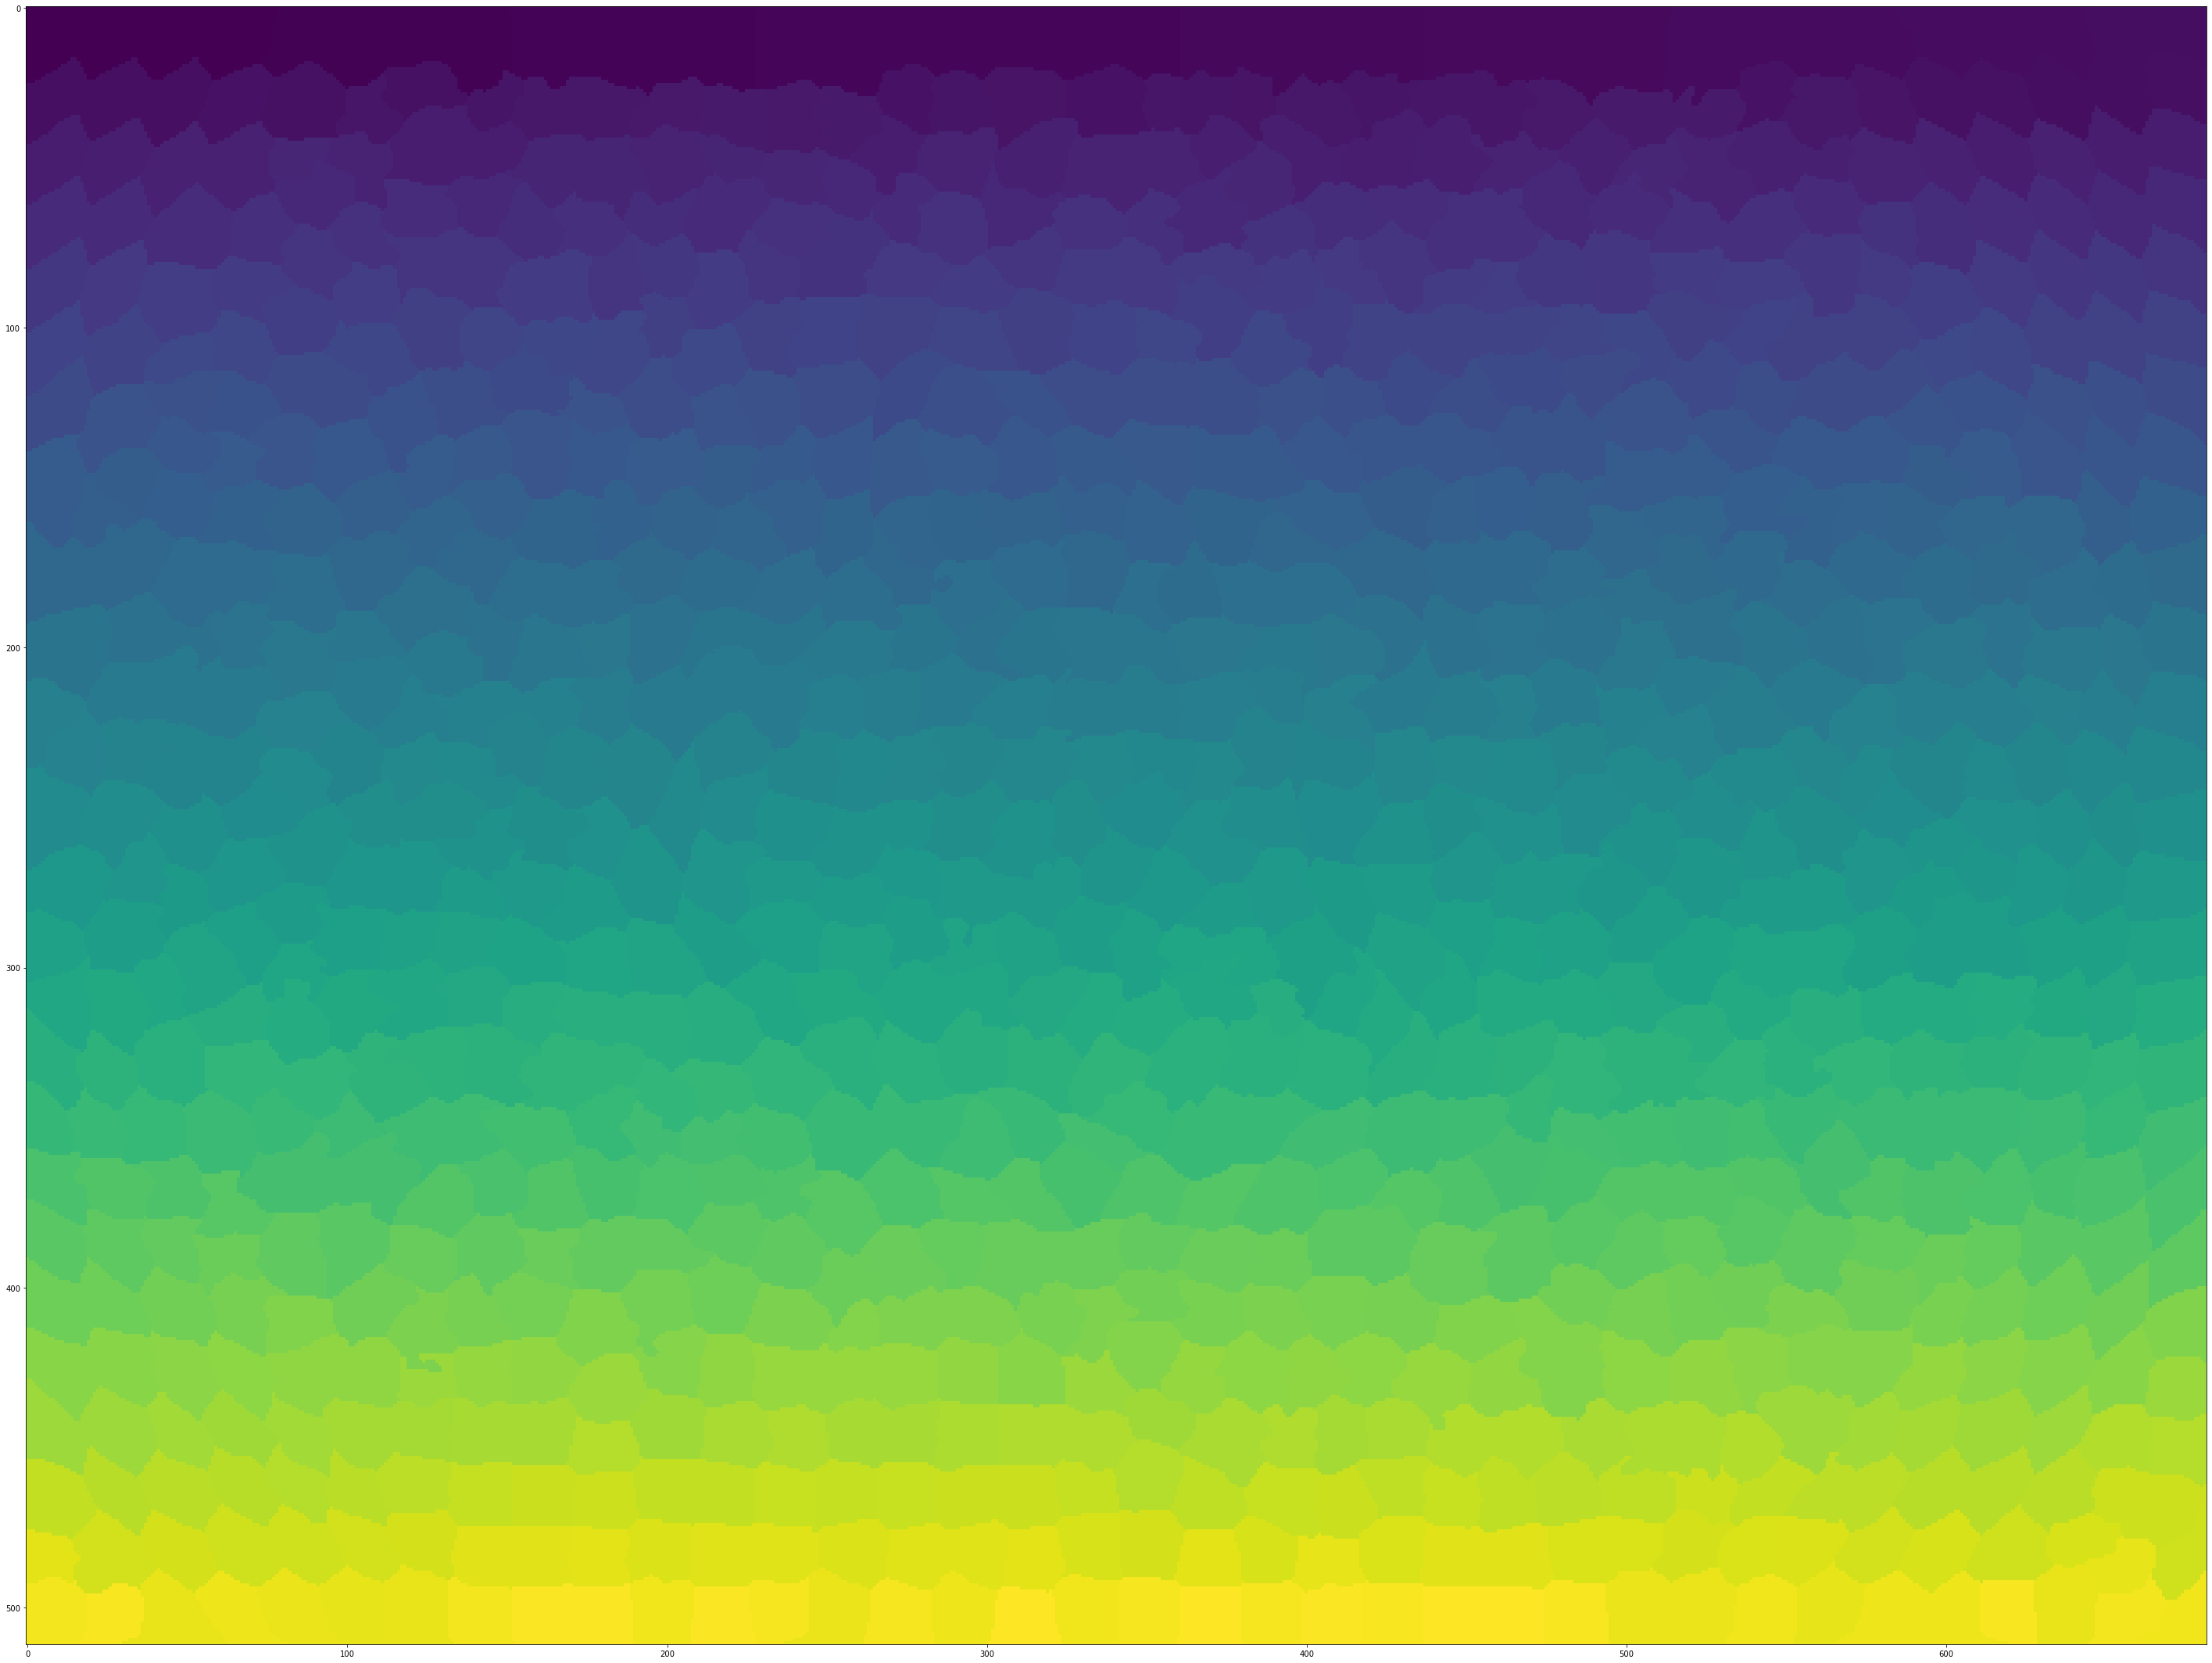

In [97]:
def union_areas_to_rect_1(image):
    img, msk = group_by_classes(image)

    group_classes = np.unique(msk)

    clr = 1488
    for cls in group_classes:
        msk[msk == cls] = clr
        clr += 1
    return msk

res = union_areas_to_rect_1(img)

plt.figure(figsize = (50,50))
plt.imshow(res)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

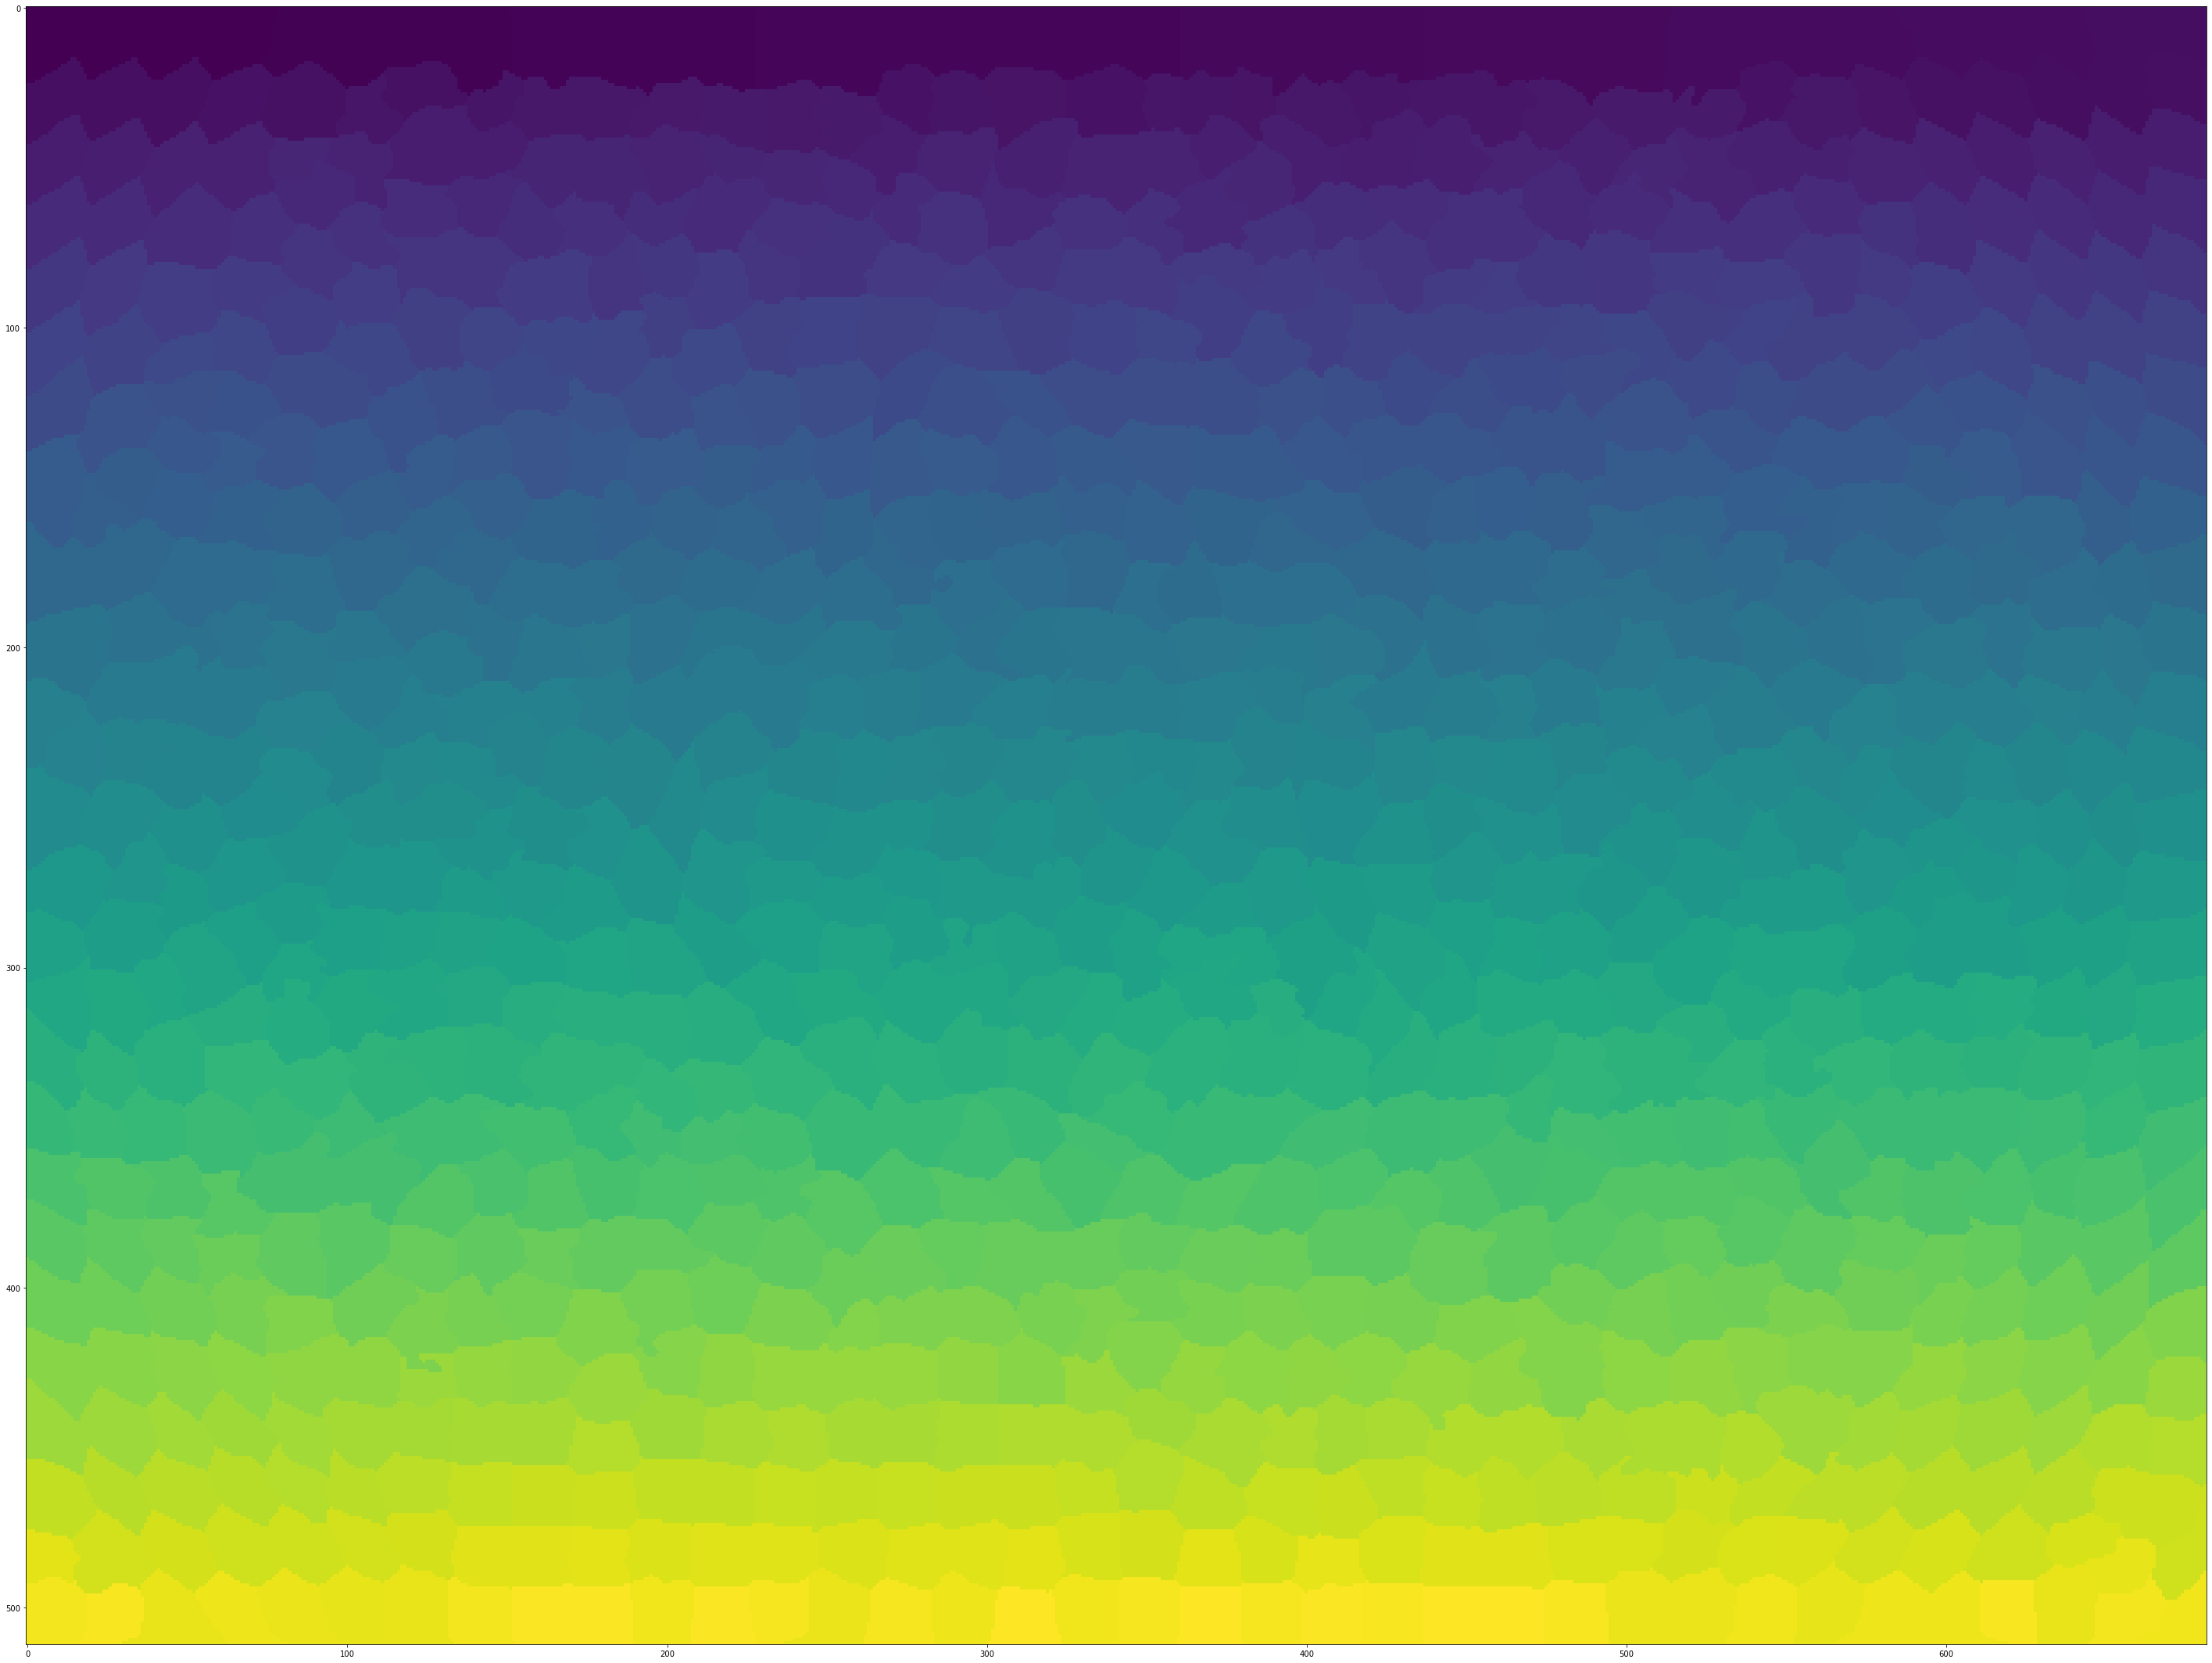

In [90]:
im, msk = group_by_classes(img)
plt.figure(figsize = (50,50))
plt.imshow(msk)
print(np.unique(msk))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

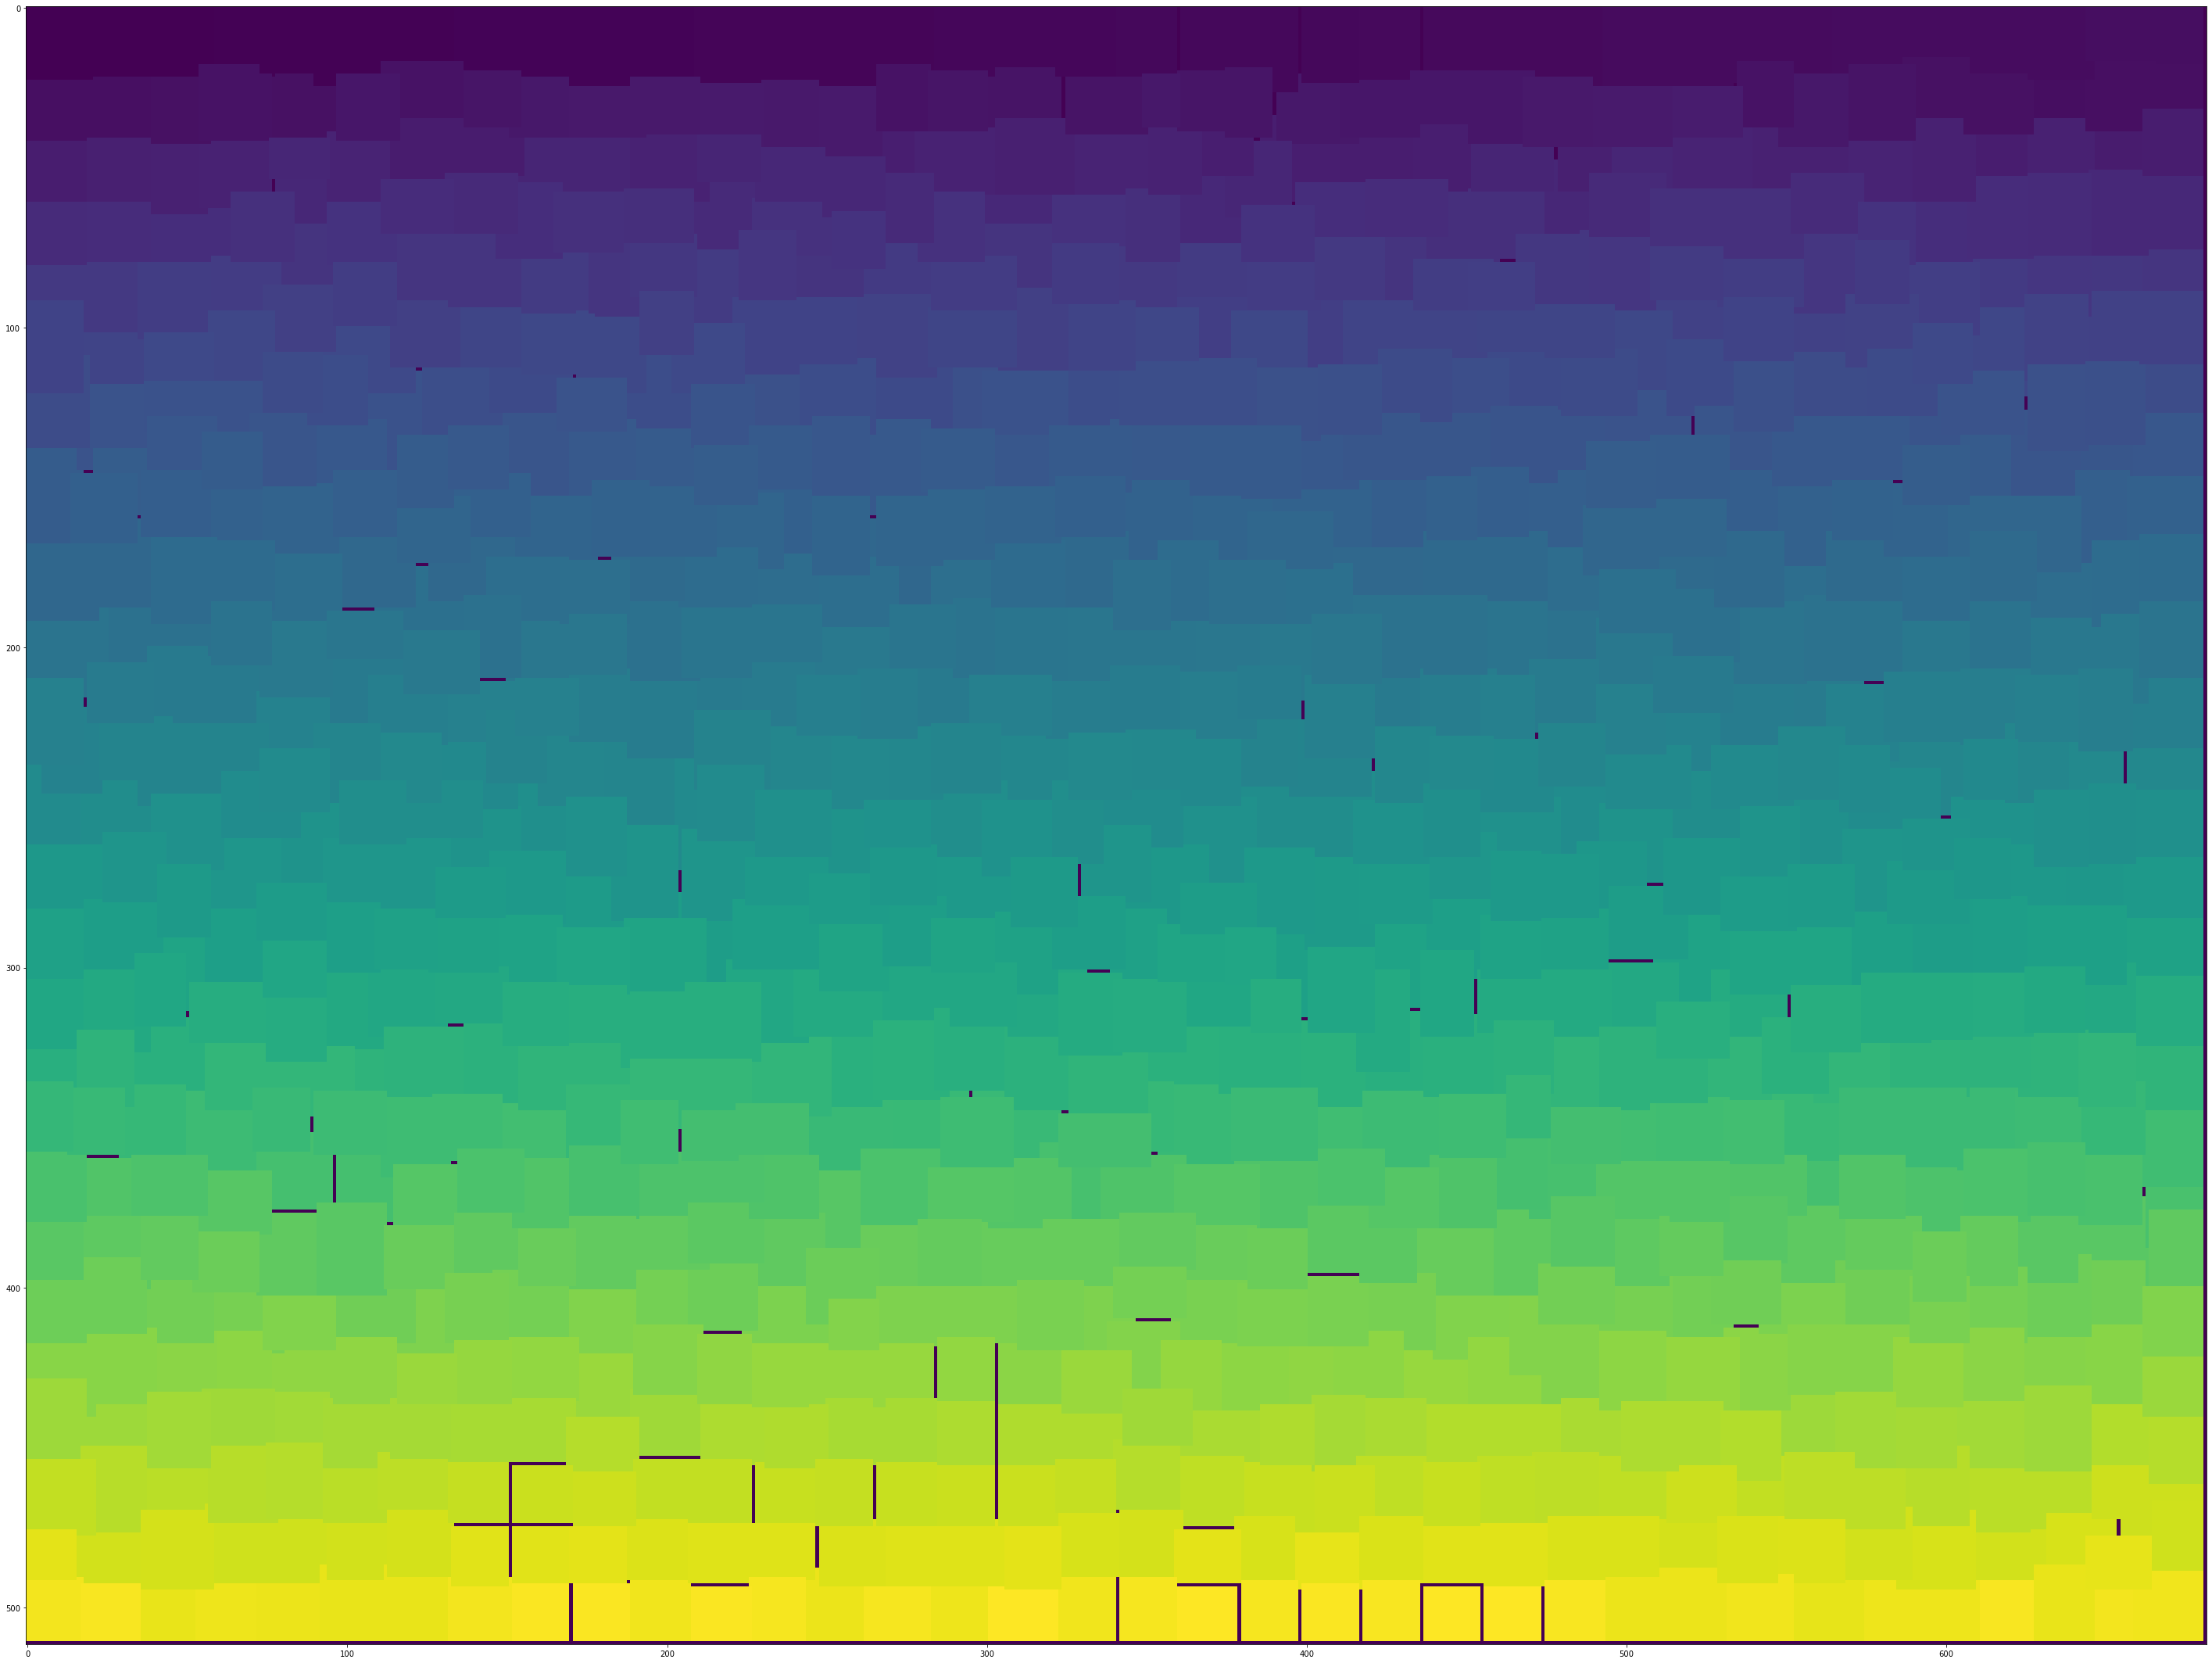

In [91]:
im = union_areas_to_rect(msk)
plt.figure(figsize = (50,50))
plt.imshow(im)
print(np.unique(im))

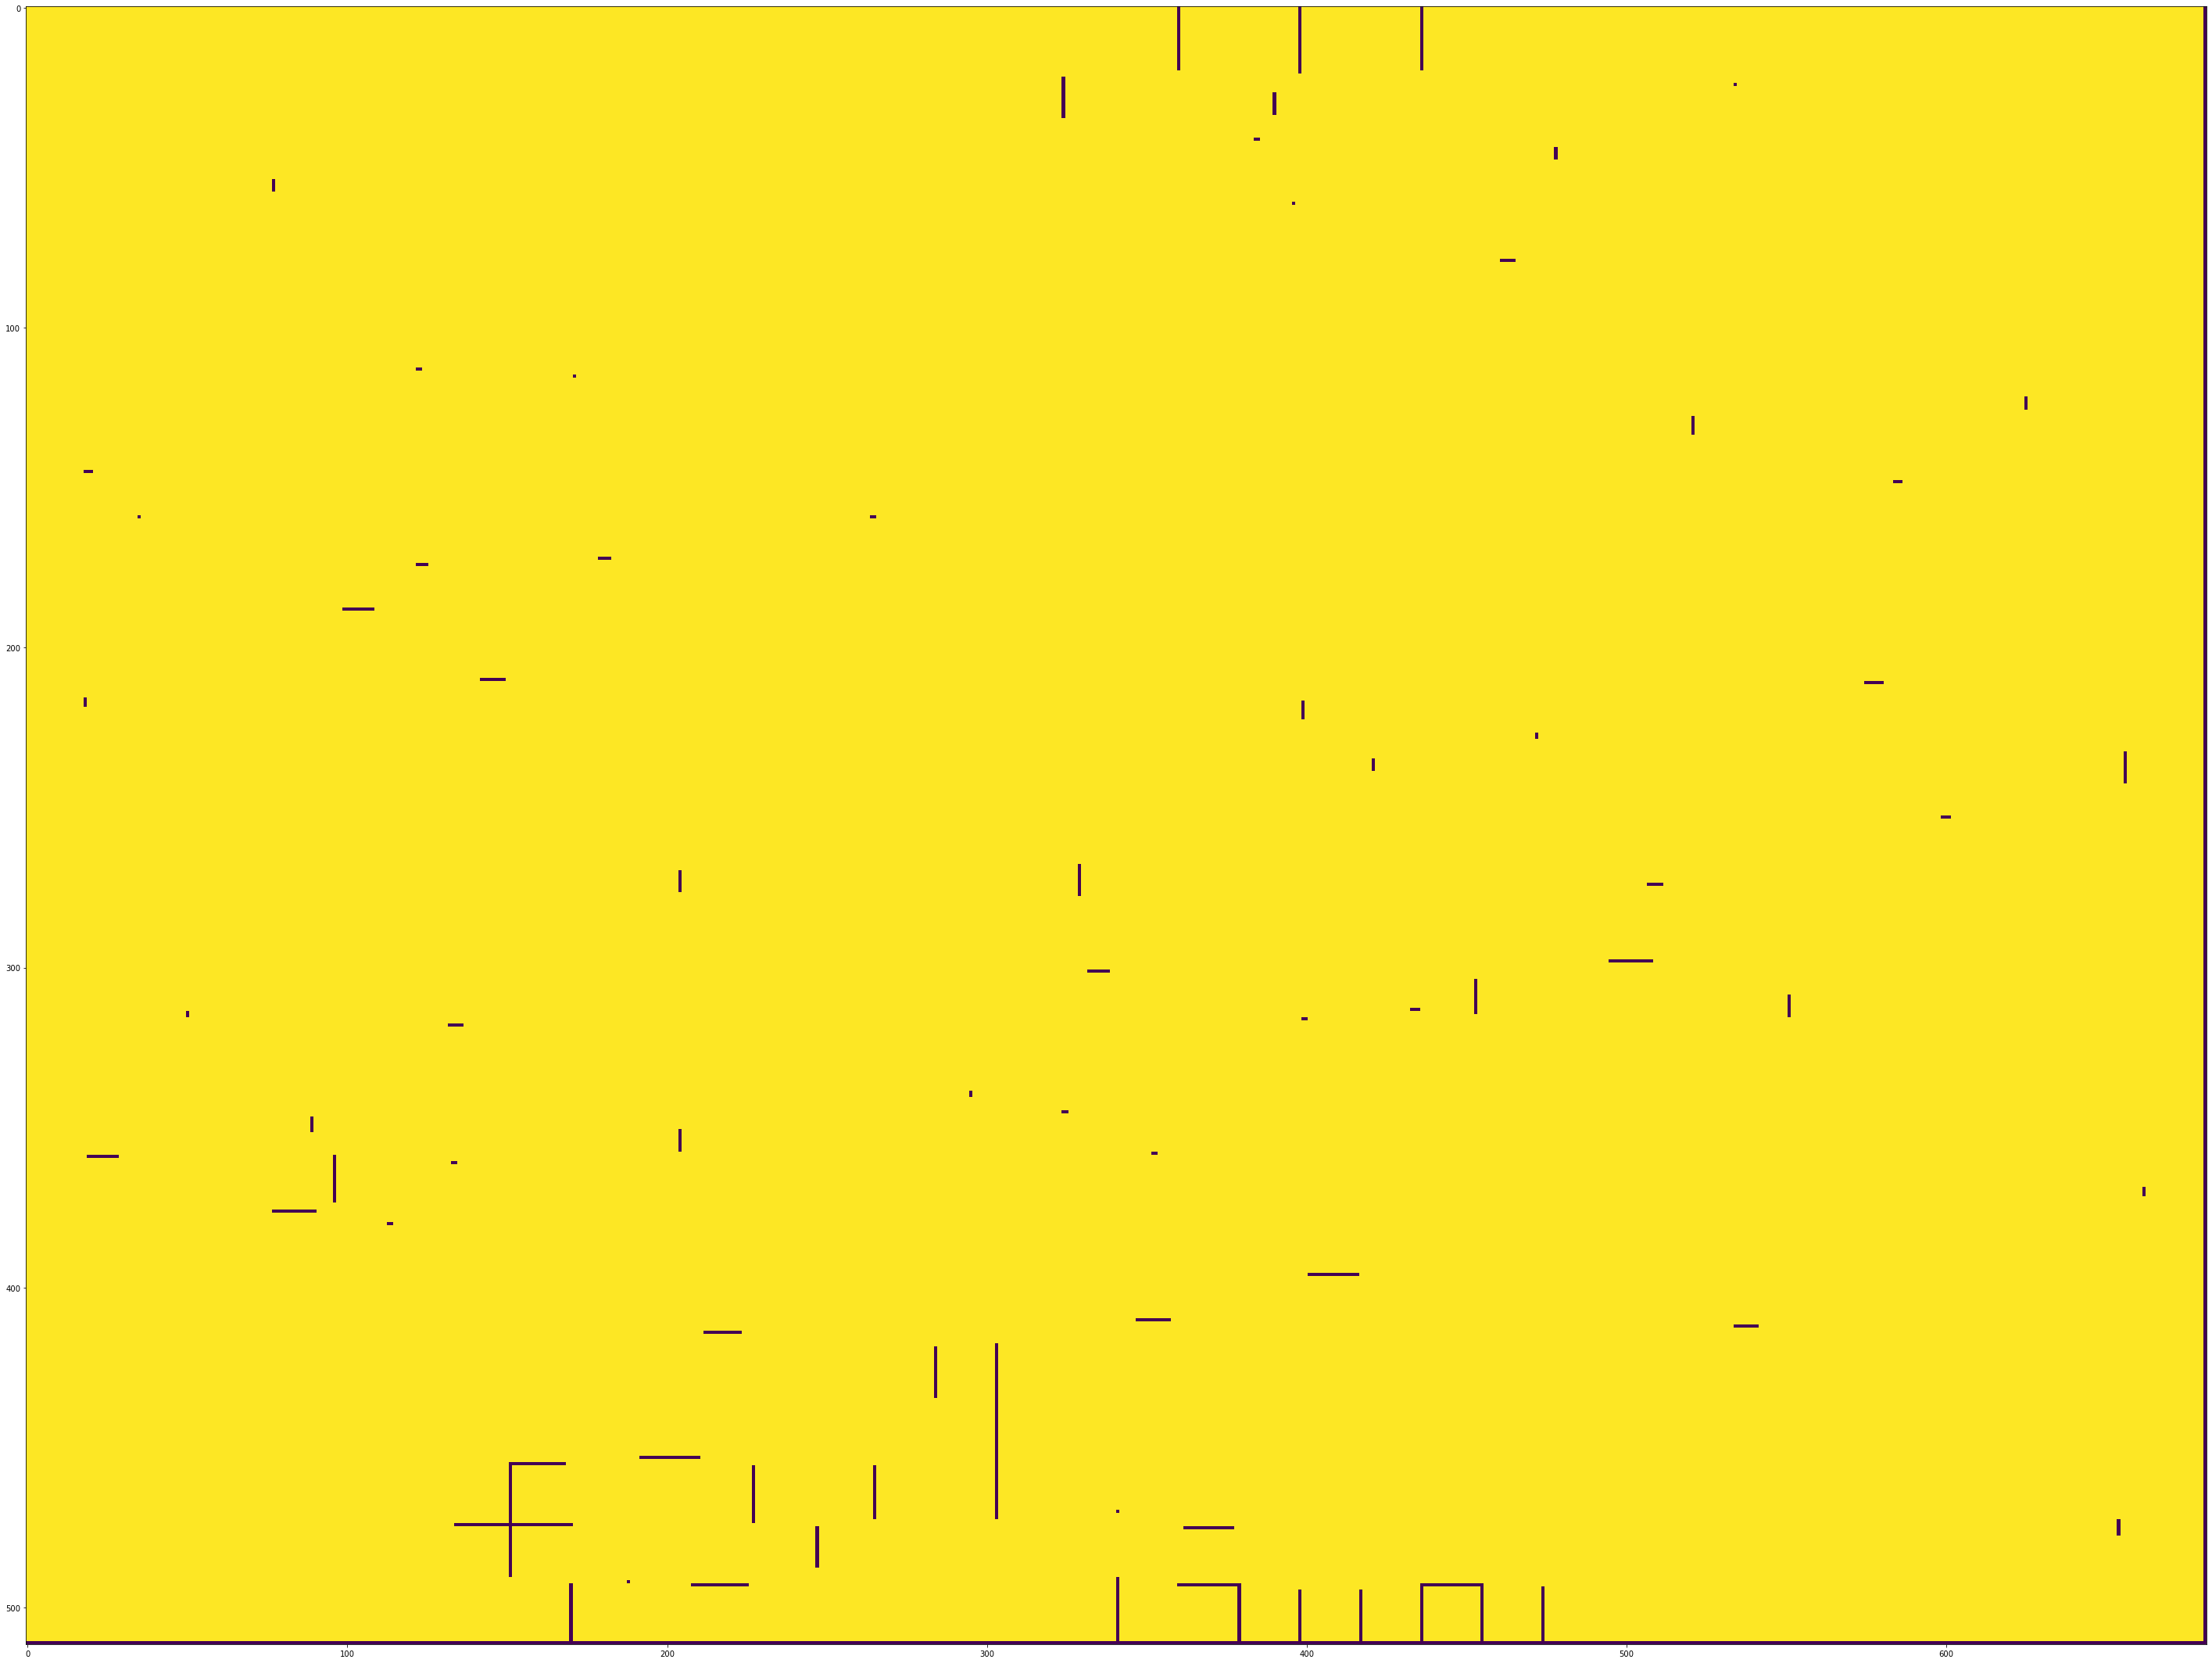

In [92]:
def union_areas_to_rect_1(image):
    img, msk = group_by_classes(image)

    group_classes = np.unique(msk)

    for cls in group_classes:
        i_idx, j_idx = np.where(msk == cls)
        color = img[i_idx[0]][j_idx[0]]
        msk[msk == cls] = color

    return msk

In [ ]:
img = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/instance_map_no_border_box/ISIC_0000374_instance.png')
plt.figure(figsize = (50,50))
plt.imshow(img)

In [93]:
print(np.unique(img))

[0. 1.]


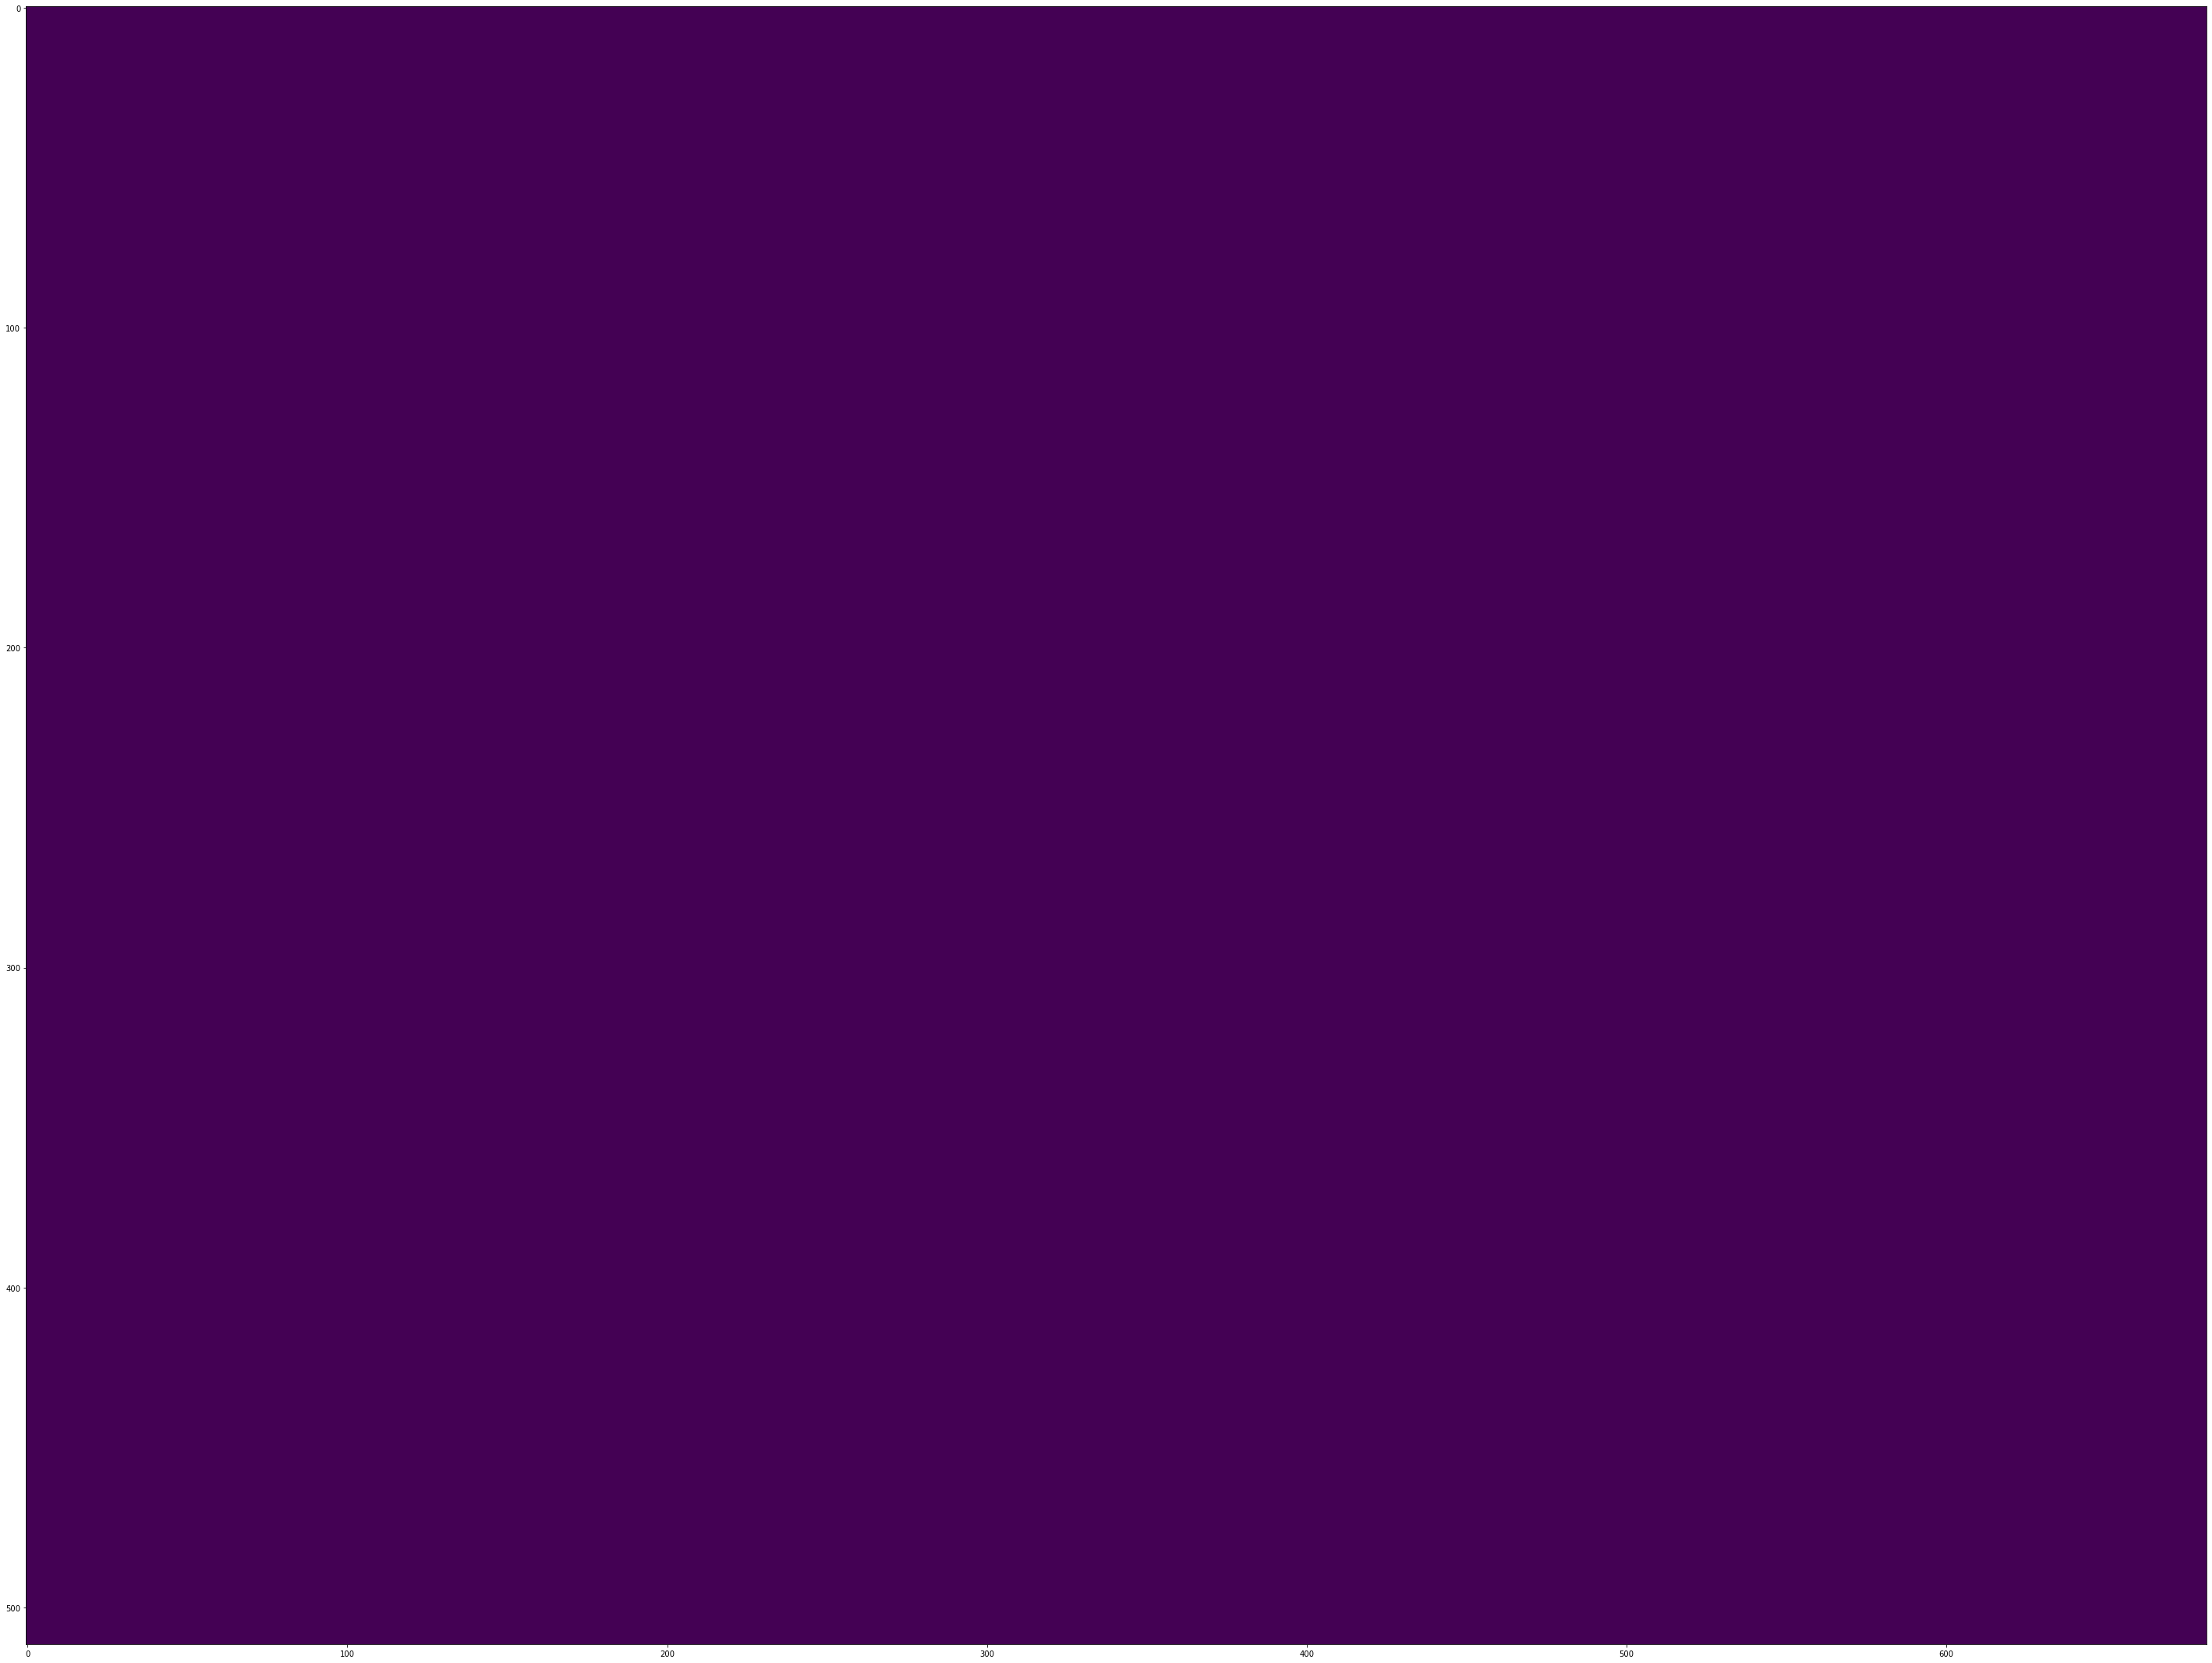

In [99]:
img = mpimg.imread('//Users/nduginets/PycharmProjects/master-diploma/300img/attribute_512p_box/ISIC_0000374_attribute_globules.png')
plt.figure(figsize = (50,50))
plt.imshow(img)

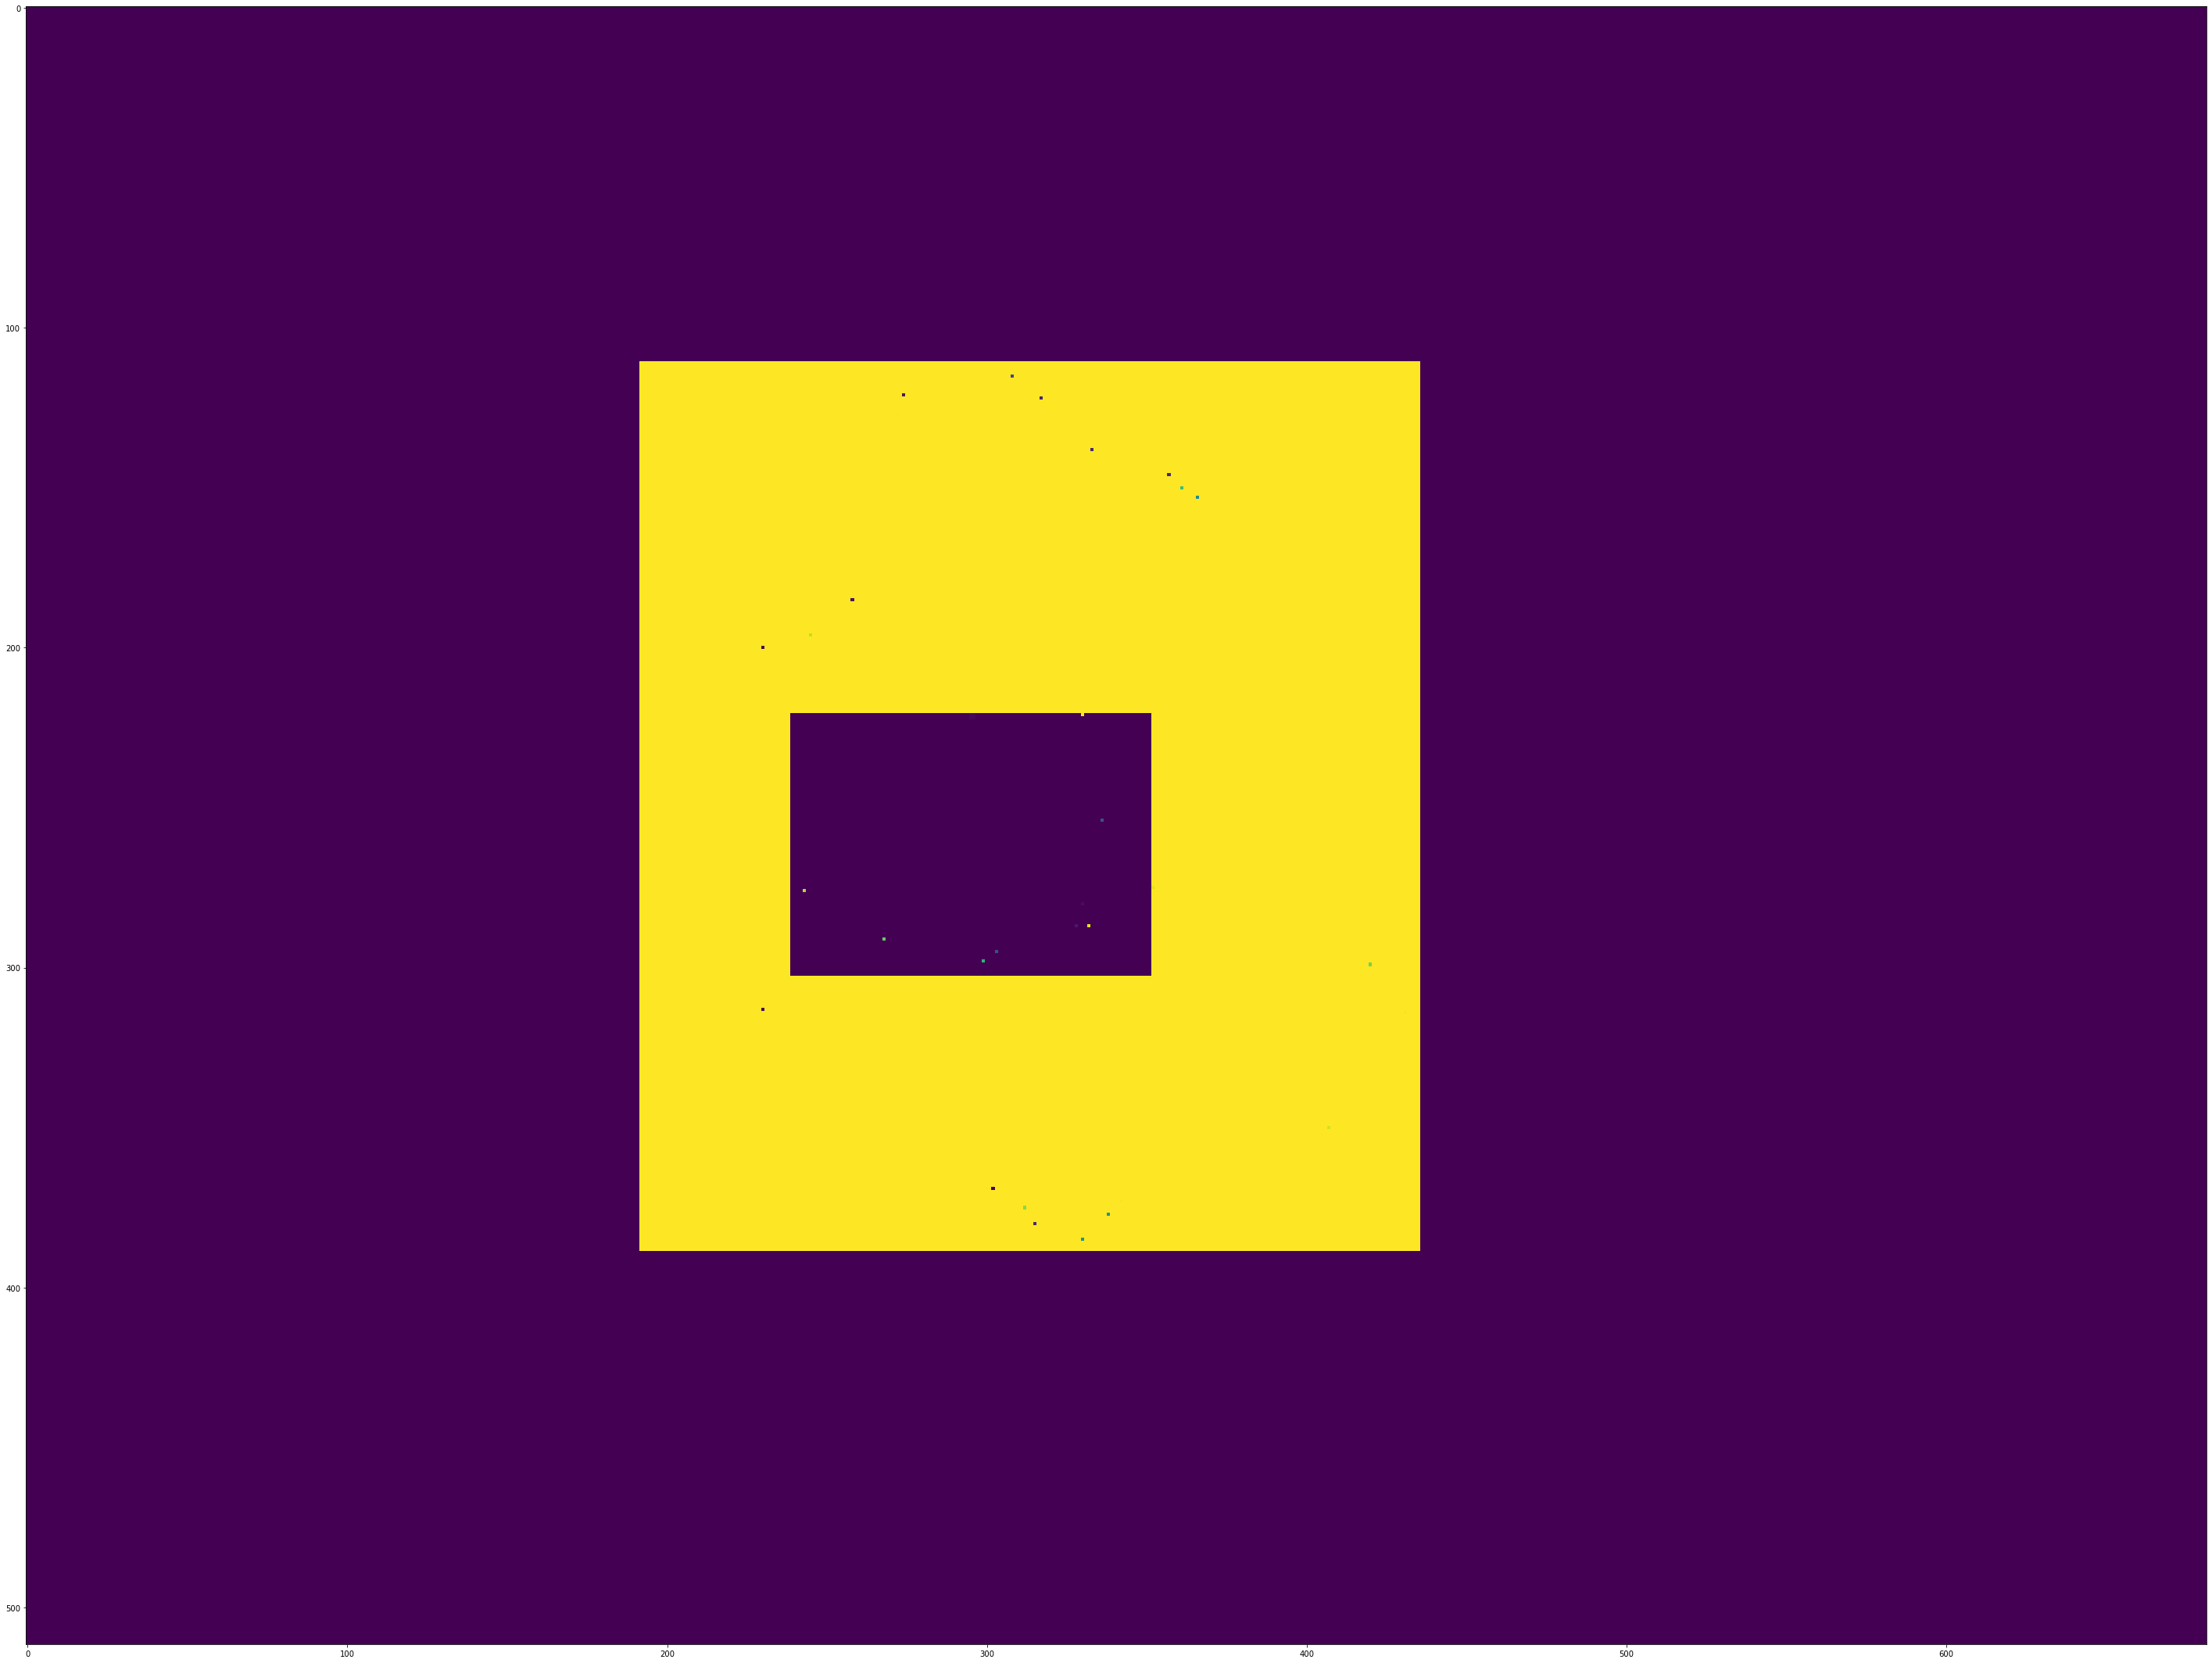

In [100]:
img = mpimg.imread('//Users/nduginets/PycharmProjects/master-diploma/300img/attribute_512p_box/ISIC_0000374_attribute_pigment_network.png')
plt.figure(figsize = (50,50))
plt.imshow(img)

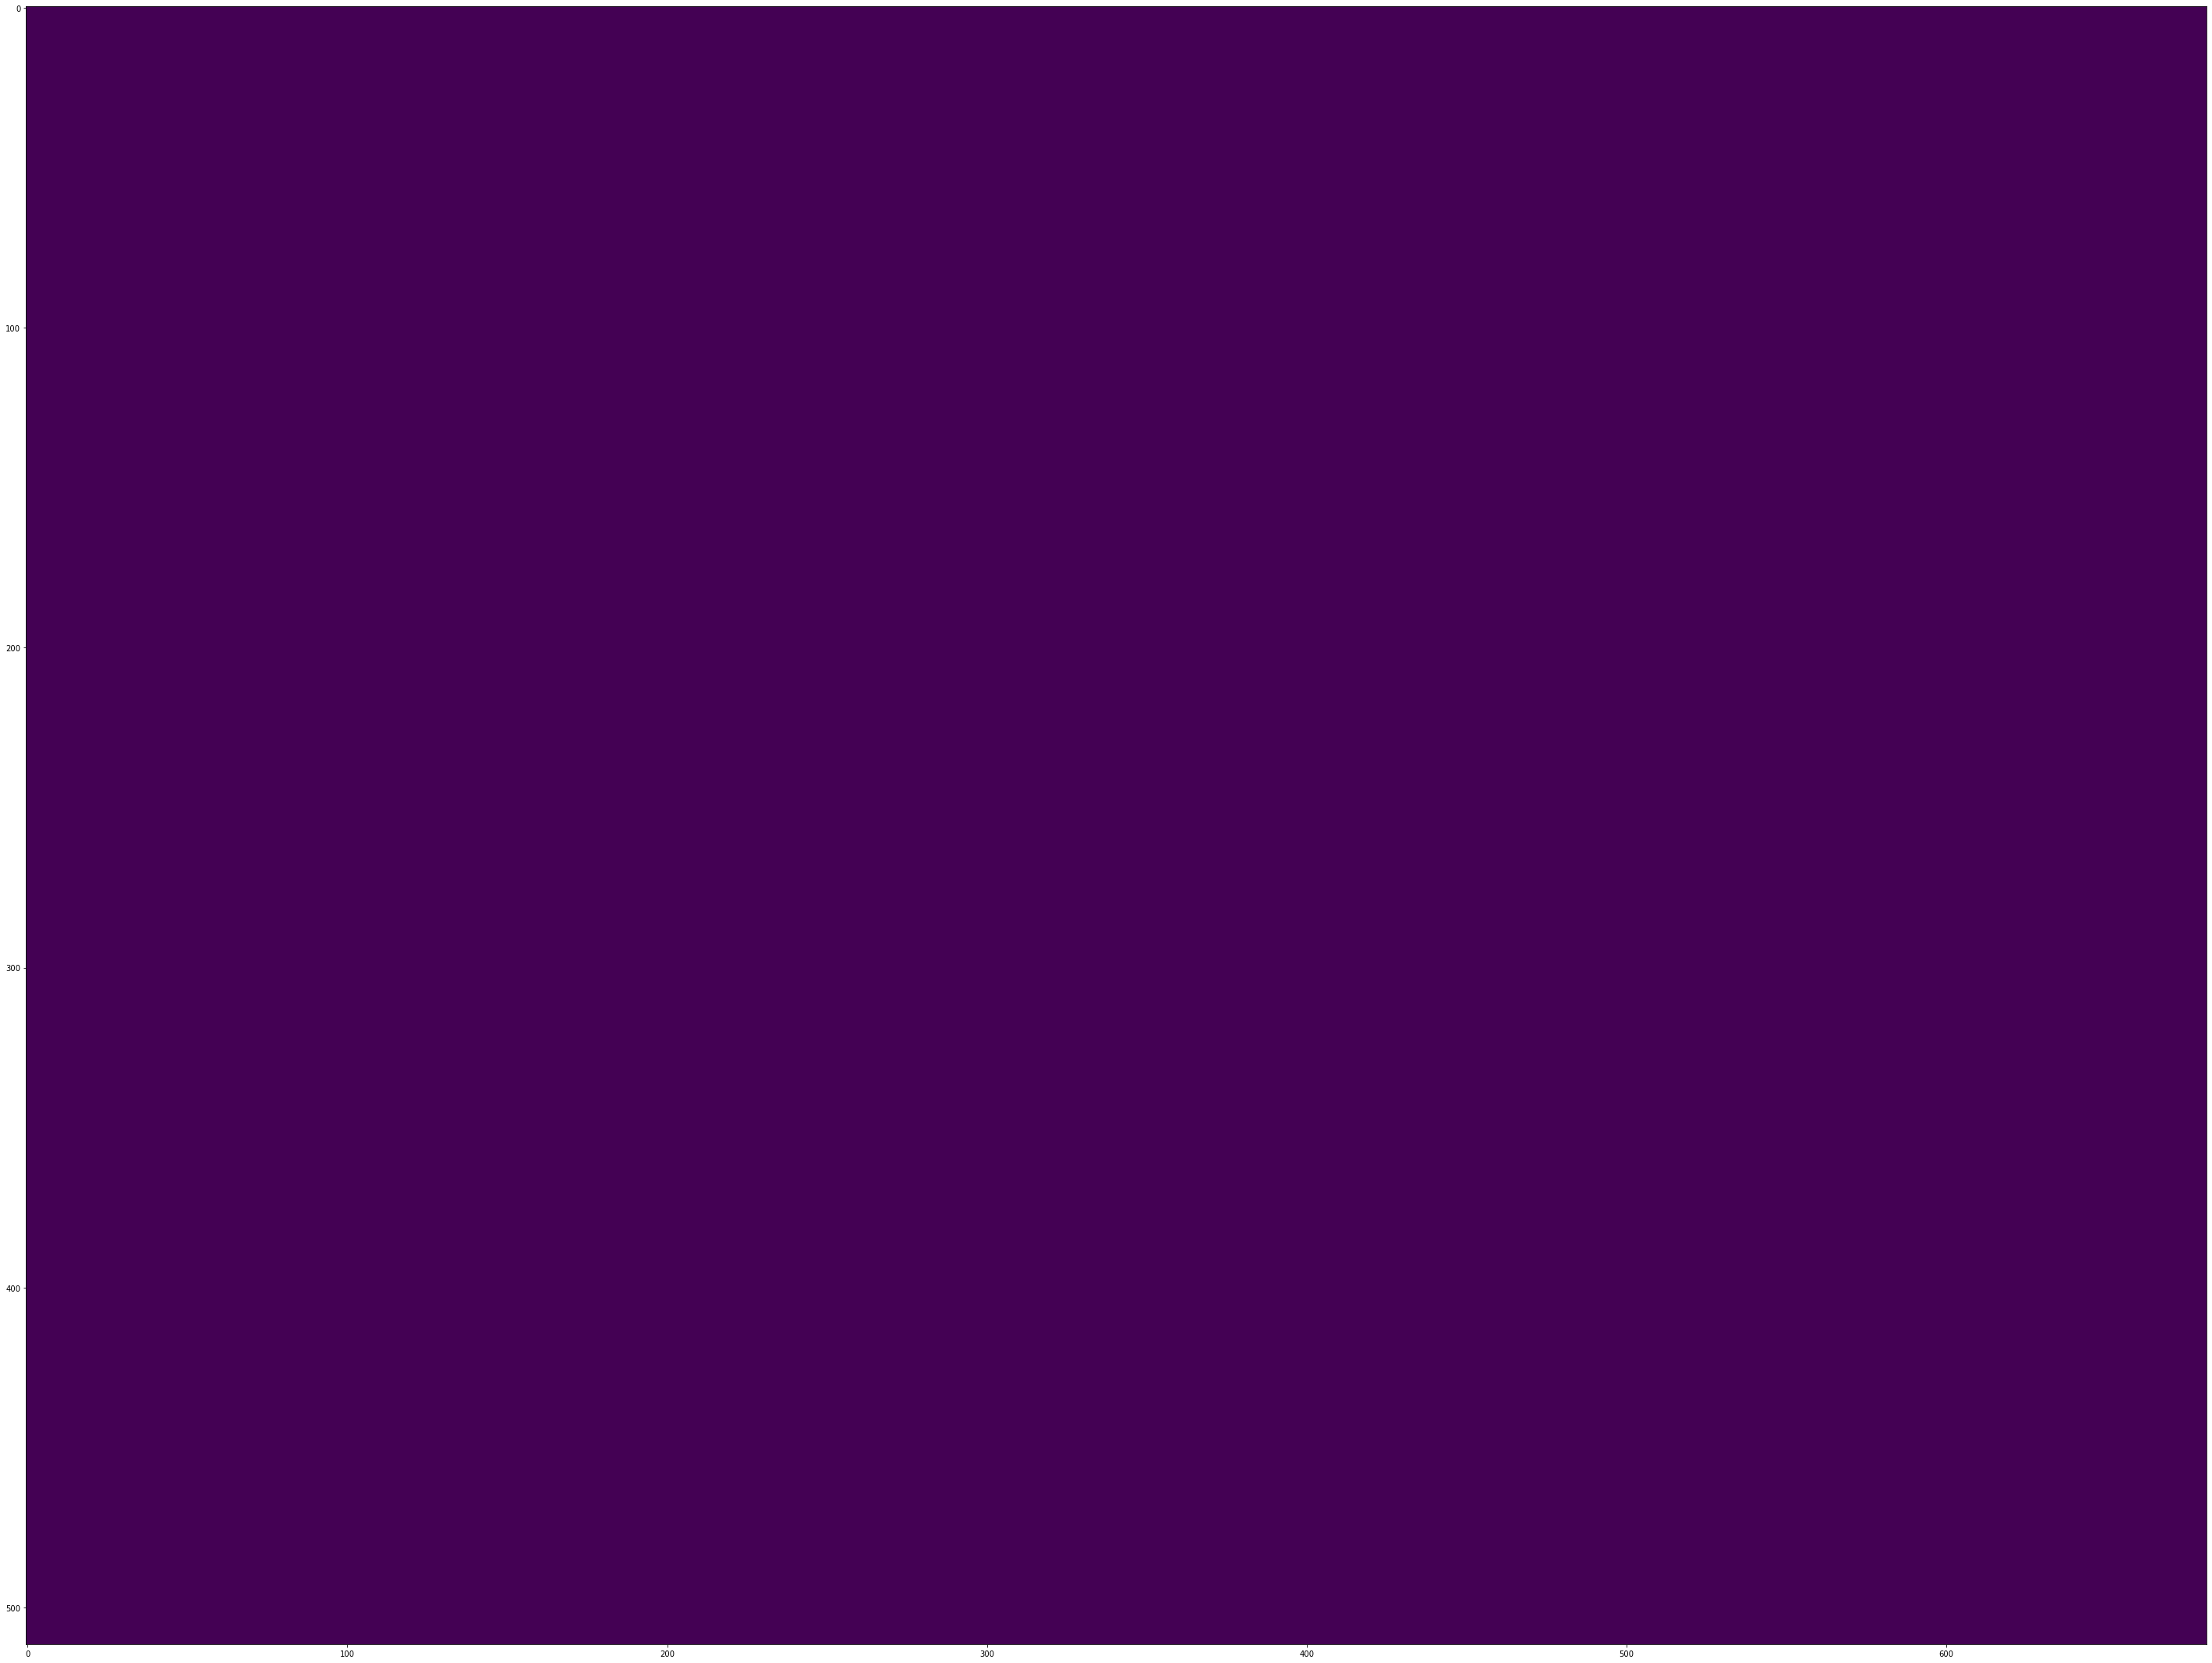

In [101]:
img = mpimg.imread('//Users/nduginets/PycharmProjects/master-diploma/300img/attribute_512p_box/ISIC_0000374_attribute_milia_like_cyst.png')
plt.figure(figsize = (50,50))
plt.imshow(img)

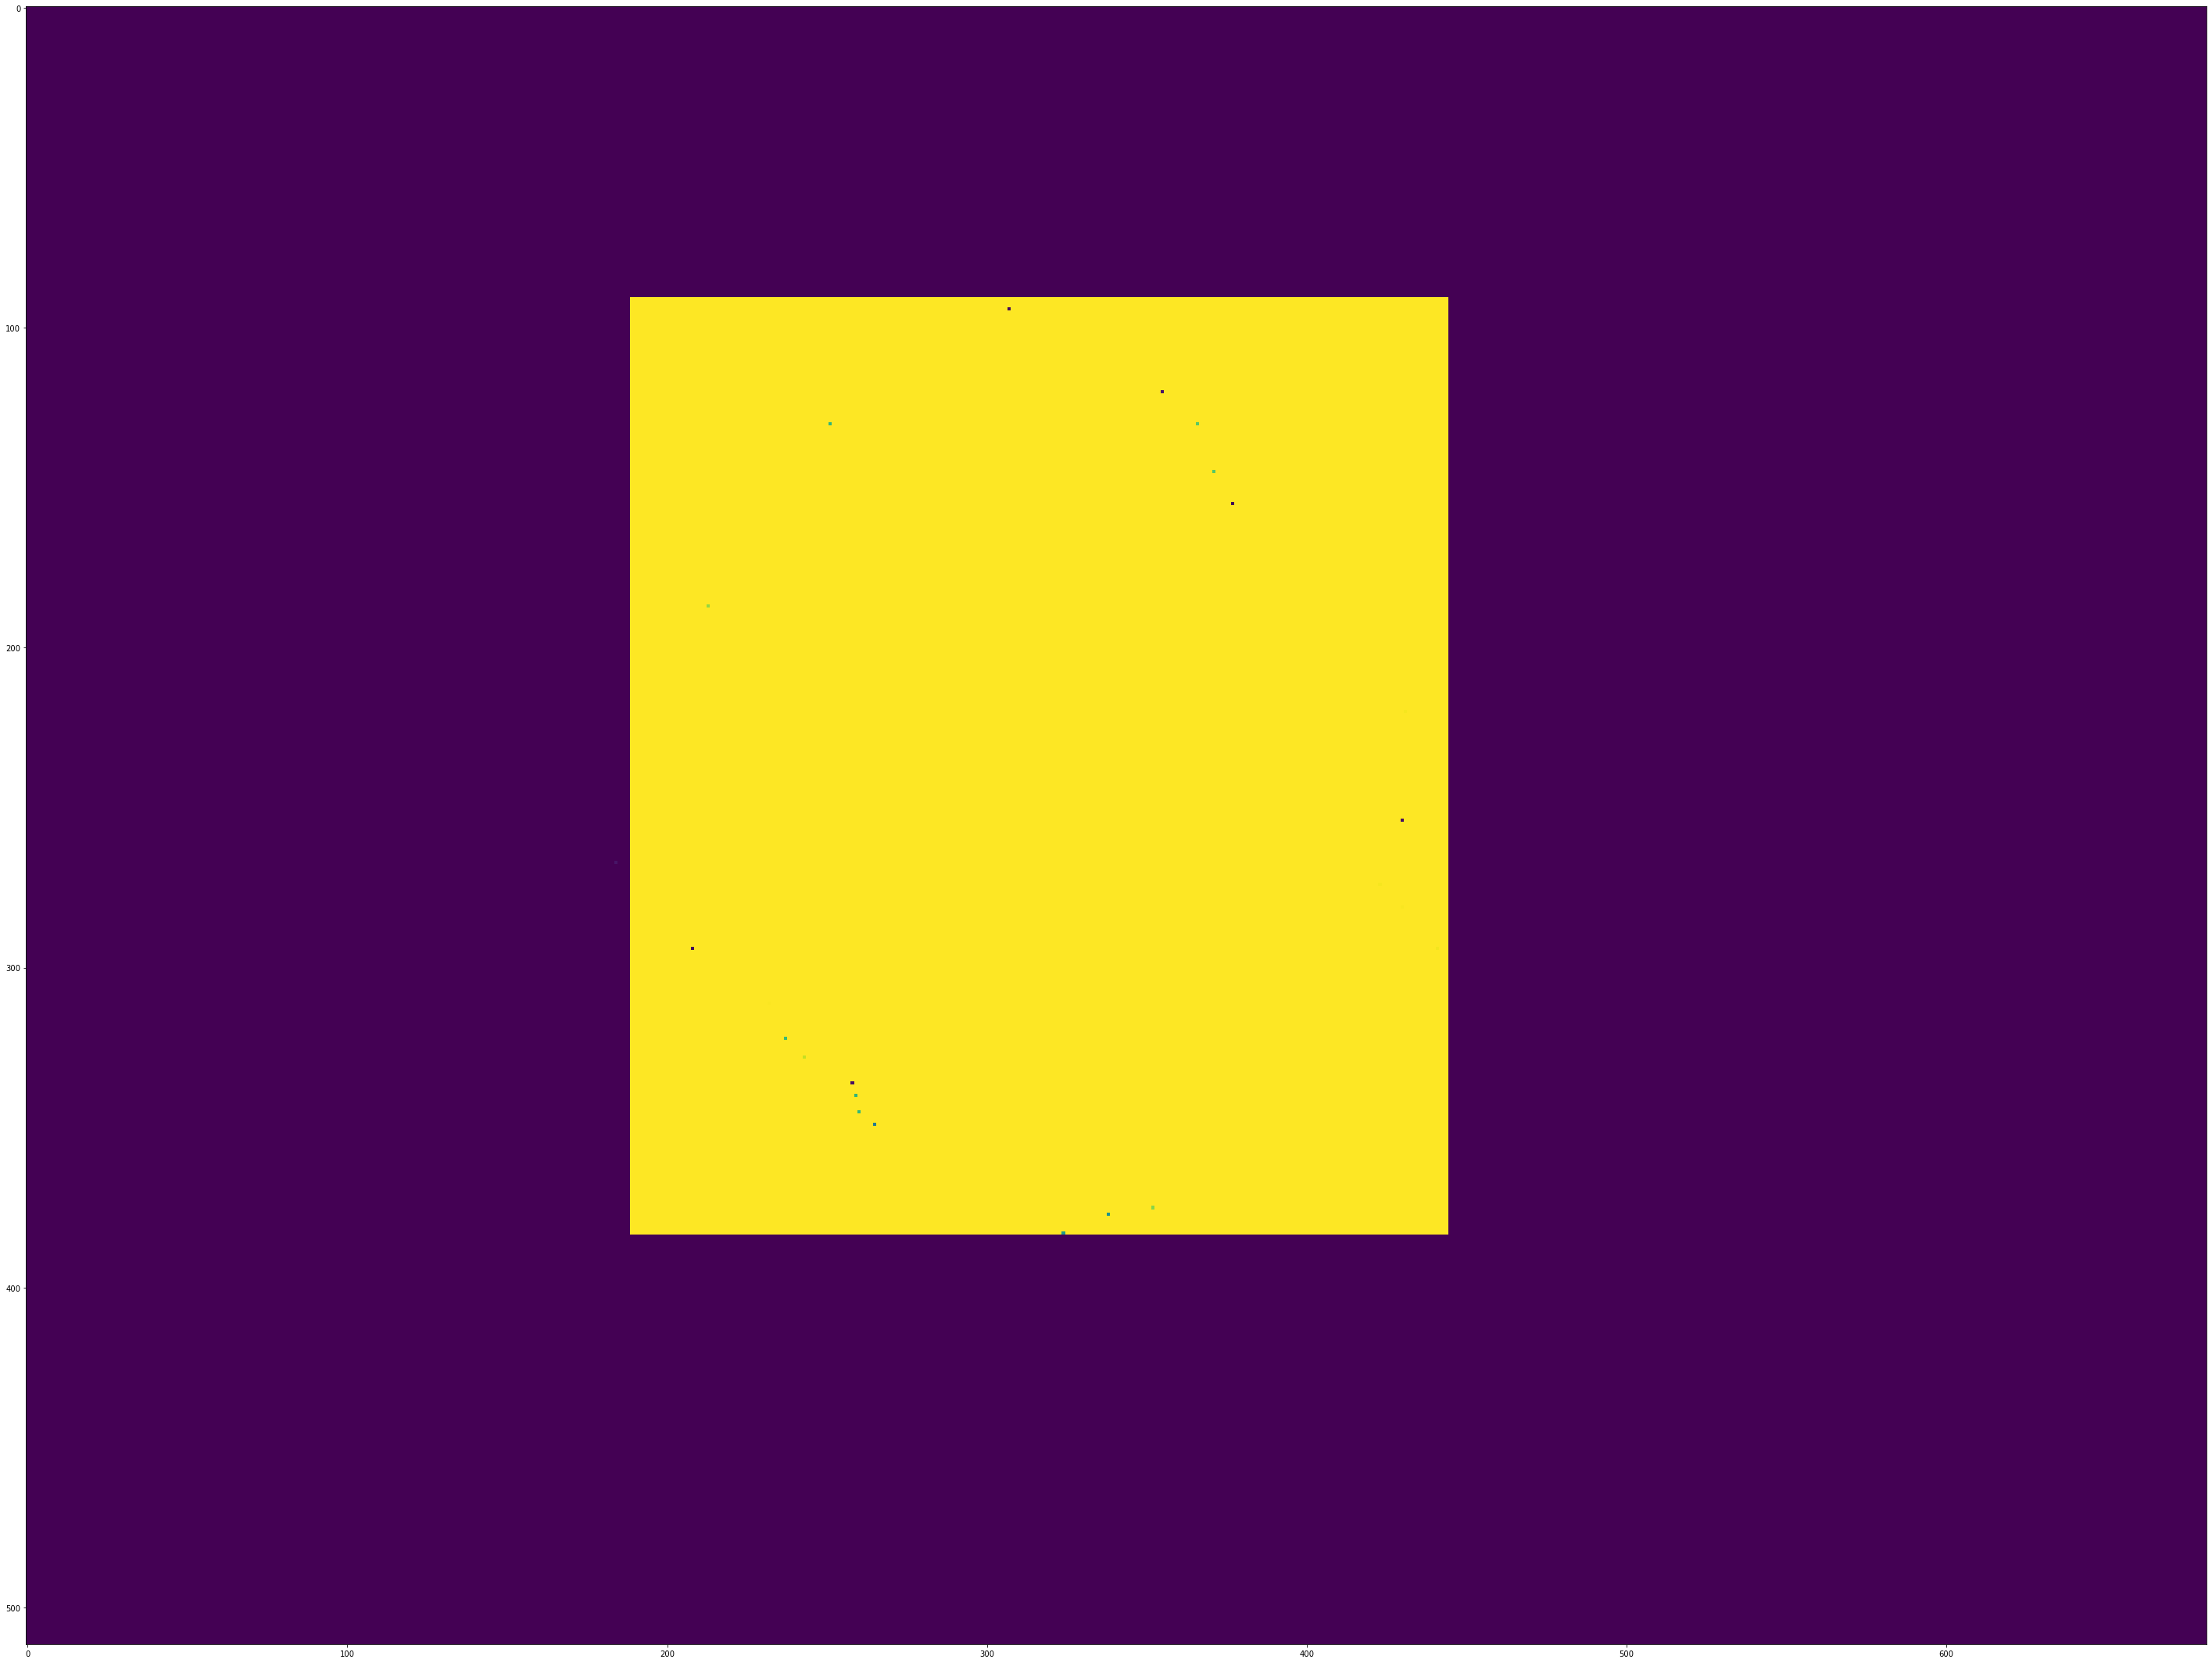

In [104]:
img = mpimg.imread('//Users/nduginets/PycharmProjects/master-diploma/300img/seg_512p_box/ISIC_0000374_segmentation.png')
plt.figure(figsize = (50,50))
plt.imshow(img)